# <center>Lending Club Case Study</center>
## Insightful Loan Default - Exploratory Data Analysis
The largest online consumer finance company __Lending Club__ specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a ___decision for loan approval based on the applicant’s profile___.
## Business Objective
Objective is to ___identify the risky loan applicants at the time of loan application___ so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.<br><br>
In other words, to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment. And thus, minimise the risk of losing money while lending to customers.
### Analysis by:
* Manoj Romina
* Pradeep Kumar S [Group Facilitator]

In [1]:
# importing packages
import numpy as np
import pandas as pd

In [2]:
# importing visualization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# setting configurations

## Setting the sns style
sns.set(style="whitegrid")

## To suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None

## To suppress the scientific notation
pd.options.display.float_format = "{:.2f}".format

## setting display options
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

## Exploratory Data Analysis
The complete loan data for all loans issued through the __time period 2007 to 2011__
along with the data dictionary has been provided.

In [4]:
# loading the loan file
loan_df = pd.read_csv('loan.csv', low_memory=False)
loan_df.shape

(39717, 111)

In [5]:
# Show first 2 records of the loan_df dataframe
loan_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


## Data Cleaning
### Removing Columns with Null Values
Calculating the missing values across all the columns in terms of percentage.

In [6]:
# get the column wise null value percentage for the entire dataframe
missing_values_pct = round(100*loan_df.isnull().sum()/len(loan_df.index), 2)
missing_values_pct

id                                 0.00
member_id                          0.00
loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_title                          6.19
emp_length                         2.71
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
pymnt_plan                         0.00
url                                0.00
desc                              32.58
purpose                            0.00
title                              0.03
zip_code                           0.00
addr_state                         0.00
dti                                0.00


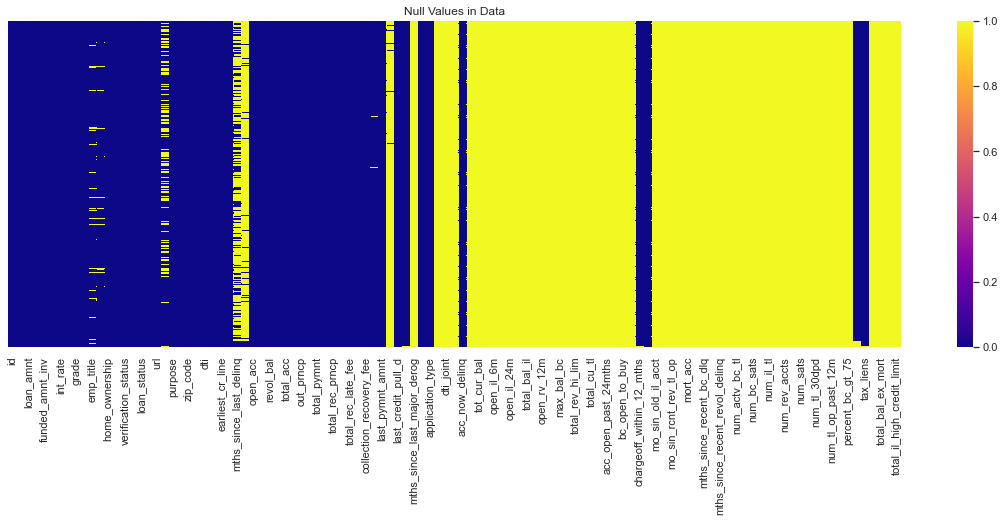

In [7]:
# plotting a heatmap to represent missing values
plt.figure(figsize=(20, 6))
sns.heatmap(loan_df.isnull(), yticklabels=False, cmap='plasma')
plt.title('Null Values in Data')
plt.show()

Identifying the count of columns with missing values greater than __`50%`__.

In [8]:
# Identifying number of columns with null values greater than 50%
missing_values_pct[missing_values_pct >= 50].index.nunique()

57

There are __57 columns with null values greater than 50%__ which wouldn't add any significance to the analysis and is _not feasible to impute_ them as well.<br>
Hence, getting the ___list of these 57 columns that can dropped from the main dataframe___.

In [9]:
# get columns with null values greater than 50%
columns_tobe_dropped = missing_values_pct[missing_values_pct >= 50].index.unique()
columns_tobe_dropped

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [10]:
# proceeding to drop the columns and checking the shape post that
loan_df = loan_df.drop(list(columns_tobe_dropped), axis=1)
loan_df.shape

(39717, 54)

Checking for any duplicate records and drop them if found.

In [11]:
# dropping duplicate records
loan_df = loan_df.drop_duplicates()
loan_df.shape

(39717, 54)

We can observe that there are __NO duplicate records found__ as the shape remains same after trying to drop duplicates.
### Removing Irrelevant Columns
Identifying the unique values for the remaining columns and __remove__ those columns with __ONLY ONE unique value__.

In [12]:
# get the unique value count of all the columns and arrange in ascending order
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

We can observe that __9 columns__ have just a ___single unique value___ which adds no significance to the analysis.
Hence proceeding to drop columns __`tax_liens, delinq_amnt, chargeoff_within_12_mths, acc_now_delinq, application_type, policy_code, initial_list_status, collections_12_mths_ex_med`__ and  __`pymnt_plan`__.

In [13]:
# proceeding to drop the columns with ONLY ONE unique value
loan_df = loan_df.drop(
    ['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 
     'policy_code', 'initial_list_status', 'collections_12_mths_ex_med', 'pymnt_plan'], axis=1
)
loan_df.shape

(39717, 45)

In [14]:
# get dataframe details
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

Based on the data dictionary provided, we have identified columns that can be dropped as they are irrelevant and don't add any significance to the data analysis.
- __`id`__ -> Unique ID assigned for loan listing (39717 unique values).
- __`member_id`__ -> A unique LC assigned Id for the borrower member (39717 unique values).
- __`emp_title`__ -> The job title supplied by the Borrower when applying for the loan (28820 unique values). No valuable inference from employee titles.
- __`url`__ -> URL for the LC page with listing data (39717 unique values). No valuable inference from URLs.
- __`desc`__ -> Loan description provided by the borrower (26527 unique values). Not a useful column for EDA.
- __`zip_code`__ -> The first 3 numbers of the zip code provided by the borrower in the loan application (823 unique values). Incomplete data provided as only first 3 numbers out of 5.
- __`addr_state`__ -> The state provided by the borrower in the loan application (50 unique values). No valuable inference from state/city of the borrower belongs to.
- __`delinq_2yrs`__ -> The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years (11 unique values). This is a post approval data field.
- __`out_prncp`__ -> Remaining outstanding principal for total amount funded (1137 unique values). This is a post approval data field.
- __`out_prncp_inv`__ -> Remaining outstanding principal for portion of total amount funded by investors (1138 unique values). This is a post approval data field.
- __`total_pymnt`__ -> Payments received to date for total amount funded (37850 unique values). This is a post approval data field.
- __`total_pymnt_inv`__ -> Payments received to date for portion of total amount funded by investors (37518 unique values). This is a post approval data field.
- __`total_rec_prncp`__ -> Principal received to date (7976 unique values). This is a post approval data field.
- __`total_rec_int`__ -> Interest received to date (35148 unique values). This is a post approval data field.
- __`total_rec_late_fee`__ -> Late fees received to date (1356 unique values). This is a post approval data field.
- __`recoveries`__ -> post charge off gross recovery (4040 unique values). This is a post approval data field.
- __`collection_recovery_fee`__ -> post charge off collection fee (2616 unique values). This is a post approval data field.
- __`last_pymnt_d`__ -> Last month payment was received (101 unique values). This is a post approval data field.
- __`last_pymnt_amnt`__ -> Last total payment amount received (34930 unique values). This is a post approval data field.
- __`last_credit_pull_d`__ -> The most recent month LC pulled credit for this loan (106 unique values). This is a post approval data field.
- __`pub_rec_bankruptcies`__ -> Number of public record bankruptcies (3 unique values). More than 99% have the same value and hence won't add any significance to the analysis.

In [15]:
# proceeding to drop the irrelevant columns identified above
loan_df = loan_df.drop(
    ['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'addr_state', 'delinq_2yrs', 'out_prncp', 'out_prncp_inv', 
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
     'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies'], 
    axis=1)
loan_df.shape

(39717, 24)

Calculating _null value percentage_ for the remaining columns.

In [16]:
# Null value percentage for the remaining columns
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

loan_amnt             0.00
funded_amnt           0.00
funded_amnt_inv       0.00
term                  0.00
int_rate              0.00
installment           0.00
grade                 0.00
sub_grade             0.00
emp_length            2.71
home_ownership        0.00
annual_inc            0.00
verification_status   0.00
issue_d               0.00
loan_status           0.00
purpose               0.00
title                 0.03
dti                   0.00
earliest_cr_line      0.00
inq_last_6mths        0.00
open_acc              0.00
pub_rec               0.00
revol_bal             0.00
revol_util            0.13
total_acc             0.00
dtype: float64

We can observe that for 3 columns, we have null values lesser than __3%__, we can proceed to ___drop___ these null value records as imputing them might add bias in our analysis.
The columns with null values are:

| Column | Null values (%) |
|:-|:-:|
| emp_length | 2.71 |
| revol_util | 0.13 |
| title | 0.03 |

In [17]:
# revalidating the columns with null values
columns_with_null = loan_df.columns[loan_df.isna().any()]
list(columns_with_null)

['emp_length', 'title', 'revol_util']

In [18]:
# dropping null value records for the mentioned 3 columns
loan_df = loan_df.dropna(subset=columns_with_null)
loan_df.shape

(38585, 24)

Checking again if any columns have null values

In [19]:
# check again for columns with null values
loan_df.columns[loan_df.isna().any()]

Index([], dtype='object')

We have removed all the null values and we have 37825 records for a detailed loan risk analysis.
### Standardizing Values
After data cleaning, we will identify columns to standardize values for the ease of analysis.

In [20]:
# Getting the first 2 records of loan_df dataframe
loan_df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,Computer,27.65,Jan-85,1,3,0,13648,83.70%,9
1,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,1.00,Apr-99,5,3,0,1687,9.40%,4


We observe the __'%'__ symbol to be present in __`int_rate`__ and __`revol_util`__ columns.<br>
Stripping the symbol and converting it to a numeric column.

In [21]:
# before stripping, identifying the column type of these 2 columns
loan_df[['int_rate', 'revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38585 entries, 0 to 39716
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   int_rate    38585 non-null  object
 1   revol_util  38585 non-null  object
dtypes: object(2)
memory usage: 904.3+ KB


In [22]:
# strip % and convert the column to numeric
loan_df['int_rate'] = pd.to_numeric(loan_df['int_rate'].apply(lambda x: x.strip('%')))
loan_df['int_rate'].head()

0   10.65
1   15.27
2   15.96
3   13.49
4   12.69
Name: int_rate, dtype: float64

In [23]:
# strip % and convert the column to numeric
loan_df['revol_util'] = pd.to_numeric(loan_df['revol_util'].apply(lambda x: x.strip('%')))
loan_df['revol_util'].head()

0   83.70
1    9.40
2   98.50
3   21.00
4   53.90
Name: revol_util, dtype: float64

The columns __revol_util__ and __int_rate__ have been converted to __float__.<br><br>
We can also standardize the __`term`__ column by removing the word 'months' and converting it in to numeric column.

In [24]:
# Removing the word months and converting it to numeric column
loan_df['term'] = pd.to_numeric(loan_df['term'].apply(lambda x: x.split()[0]))
loan_df['term'].head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int64

We can standardize the __`emp_length`__ column which is according to the data dictionary defined as employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [25]:
# get the distributaion for the employee length column
loan_df['emp_length'].value_counts()

10+ years    8877
< 1 year     4570
2 years      4383
3 years      4091
4 years      3427
5 years      3276
1 year       3233
6 years      2225
7 years      1769
8 years      1477
9 years      1257
Name: emp_length, dtype: int64

In [26]:
# creating a dictionary to replace values with integer to standardize the column
dict_employee_length = {
    '10+ years': 10,
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9
}
loan_df = loan_df.replace({'emp_length': dict_employee_length})
loan_df['emp_length'].value_counts()

10    8877
0     4570
2     4383
3     4091
4     3427
5     3276
1     3233
6     2225
7     1769
8     1477
9     1257
Name: emp_length, dtype: int64

### Filtering Values
Considering the __`purpose`__ column.

In [27]:
# get the distribution of the purpose column
loan_df['purpose'].value_counts()

debt_consolidation    18228
credit_card            4997
other                  3818
home_improvement       2876
major_purchase         2108
small_business         1781
car                    1495
wedding                 933
medical                 666
moving                  557
house                   368
vacation                351
educational             312
renewable_energy         95
Name: purpose, dtype: int64

In [28]:
# percentage wise spread of the purpose column
purpose_values = loan_df['purpose'].value_counts(normalize=True) * 100
purpose_values

debt_consolidation   47.24
credit_card          12.95
other                 9.90
home_improvement      7.45
major_purchase        5.46
small_business        4.62
car                   3.87
wedding               2.42
medical               1.73
moving                1.44
house                 0.95
vacation              0.91
educational           0.81
renewable_energy      0.25
Name: purpose, dtype: float64

We can observe that last 4 columns (__`house, vacation, educational, renewable_energy`__) have __values less than 1%__ and hence won't be significant to our analysis.<br>
We will proceed dropping the categories having values less than 1%.

In [29]:
# getting categories to be dropped from the purpose column
categories_tobe_dropped = purpose_values[purpose_values < 1].index.unique()
categories_tobe_dropped

Index(['house', 'vacation', 'educational', 'renewable_energy'], dtype='object')

In [30]:
# dropping records from the purpose column based on the categories with less than 1% of values
loan_df = loan_df[~(loan_df['purpose'].isin(categories_tobe_dropped))]
loan_df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving'], dtype=object)

Considering __`home_ownership`__ column. <br>
Identifying the categories that add significance to the data analysis.

In [31]:
# get the distribution count wise for home_ownership column
loan_df['home_ownership'].value_counts(normalize=False)

RENT        17822
MORTGAGE    16792
OWN          2751
OTHER          91
NONE            3
Name: home_ownership, dtype: int64

We can observe that home_ownership has 4 valid values - RENT, OWN, MORTGAGE, OTHER. However, in
data, ___None has 3 records___. Hence it can be dropped as it doesn't add any significance to our analysis.

In [32]:
# Dropping the category None from home_ownership column
loan_df = loan_df[loan_df['home_ownership'] != 'NONE']
loan_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

#### Target Variable - Loan Status
The analysis of this data is to find the loan default risk of the new applicants. <br>
We can derive the insights by taking the column __`loan_status`__ as the target variable.

In [33]:
# get loan_status distribution
loan_df['loan_status'].value_counts()

Fully Paid     31173
Charged Off     5204
Current         1079
Name: loan_status, dtype: int64

Here we observe that we have 1098 records for loan status as _current_. We can remove these records as for loan default risk analysis, we are considering ___only fully paid and charged off loans___.

In [34]:
# get the shape of our main dataframe
loan_df.shape

(37456, 24)

In [35]:
# removing the records with loan_status as 'current'
loan_df = loan_df[loan_df['loan_status'] != 'Current']
loan_df.shape

(36377, 24)

In [36]:
# loan_status distribution after removal of records with 'current'
loan_df['loan_status'].value_counts()

Fully Paid     31173
Charged Off     5204
Name: loan_status, dtype: int64

### Derived Metrics
In the previous section, we have standardized columns that are essential for the data analysis.<br>
We will now proceed to identify columns which can be used to derive new columns.

In [37]:
# display first 4 records
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,5000,4975.00,36,10.65,162.87,B,B2,10,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,Computer,27.65,Jan-85,1,3,0,13648,83.70,9
1,2500,2500,2500.00,60,15.27,59.83,C,C4,0,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,1.00,Apr-99,5,3,0,1687,9.40,4
2,2400,2400,2400.00,36,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,real estate business,8.72,Nov-01,2,2,0,2956,98.50,10
3,10000,10000,10000.00,36,13.49,339.31,C,C1,10,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,personel,20.00,Feb-96,1,10,0,5598,21.00,37
5,5000,5000,5000.00,36,7.90,156.46,A,A4,3,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,11.20,Nov-04,3,9,0,7963,28.30,12


Currently in our dataframe we have __2 date columns__: `issue_d` and `earliest_cr_line`.<br>
Lets first check the column types of the 2 chosen columns.

In [38]:
# checking the data types of the mentioned columns
loan_df[['issue_d', 'earliest_cr_line']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36377 entries, 0 to 39716
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   issue_d           36377 non-null  object
 1   earliest_cr_line  36377 non-null  object
dtypes: object(2)
memory usage: 852.6+ KB


Converting the object columns in to datetime columns.

In [39]:
# Conversion to pandas datatime column
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y')

In [40]:
# extracting month and year from the issue_d column and creating respective new columns
loan_df['issue_month'] = loan_df['issue_d'].dt.month
loan_df['issue_year'] = loan_df['issue_d'].dt.year
loan_df[['issue_d', 'issue_month', 'issue_year']].head()

,issue_d,issue_month,issue_year
0,2011-12-01,12,2011
1,2011-12-01,12,2011
2,2011-12-01,12,2011
3,2011-12-01,12,2011
5,2011-12-01,12,2011


In [41]:
# extracting month and year from the earliest_cr_line_month column and creating respective new columns
loan_df['earliest_cr_line_month'] = loan_df['earliest_cr_line'].dt.month
loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line'].dt.year
loan_df[['earliest_cr_line', 'earliest_cr_line_month', 'earliest_cr_line_year']].head()

,earliest_cr_line,earliest_cr_line_month,earliest_cr_line_year
0,1985-01-01,1,1985
1,1999-04-01,4,1999
2,2001-11-01,11,2001
3,1996-02-01,2,1996
5,2004-11-01,11,2004


Validating the `issue_year` and `earliest_cr_line_year` columns by observing the unique values.

In [42]:
# get unique values of the issue_year column
loan_df['issue_year'].unique()

array([2011, 2010, 2009, 2008, 2007], dtype=int64)

This reaffirms that the data provided by LC was __between 2007 to 2011__.

In [43]:
# get unique values of the earliest_cr_line_year column
loan_df['earliest_cr_line_year'].unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1979, 1978, 1972, 1970, 1969,
       1975, 1976, 1977, 1982, 2068, 1974, 1971, 2065, 2067, 1973, 2063,
       2066, 2062, 2056, 2046, 2050, 2054, 2064], dtype=int64)

The data we possess is until the year __2011__. However we can observe years __greater__ than 2011.

In [44]:
# identifying years greater than 2011
loan_df[loan_df['earliest_cr_line_year'] > 2011]['earliest_cr_line_year'].unique()

array([2068, 2065, 2067, 2063, 2066, 2062, 2056, 2046, 2050, 2054, 2064],
      dtype=int64)

This is due to the __y2k error__ as the years were stored as 2 digits and are being considered as 21st century.<br>
Cleaning the values for earliest_cr_line_year column.

In [45]:
# fixing the y2k error by subtrating records greater than 2011 with 100
loan_df.loc[loan_df['earliest_cr_line_year'] > 2011, 'earliest_cr_line_year'] = loan_df['earliest_cr_line_year'] - 100
loan_df['earliest_cr_line_year'].unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1979, 1978, 1972, 1970, 1969,
       1975, 1976, 1977, 1982, 1968, 1974, 1971, 1965, 1967, 1973, 1963,
       1966, 1962, 1956, 1946, 1950, 1954, 1964], dtype=int64)

We can derive a new column of loan to income ratio based on the columns `loan_amnt` and `annual_inc`.

In [46]:
loan_df['loan_income_ratio'] = round(loan_df['loan_amnt']/loan_df['annual_inc'], 2)
loan_df['loan_income_ratio'].head()

0   0.21
1   0.08
2   0.20
3   0.20
5   0.14
Name: loan_income_ratio, dtype: float64

We have cleaned and standardized most of the data from load_df dataframe. Hence we will be proceeding to the Data Analysis.
## Data Analysis
### Univariate and Segmented Univariate Analysis

In [47]:
loan_df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year,loan_income_ratio
0,5000,5000,4975.00,36,10.65,162.87,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,Computer,27.65,1985-01-01,1,3,0,13648,83.70,9,12,2011,1,1985,0.21
1,2500,2500,2500.00,60,15.27,59.83,C,C4,0,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,bike,1.00,1999-04-01,5,3,0,1687,9.40,4,12,2011,4,1999,0.08


In [48]:
loan_df.shape

(36377, 29)

Since we have multiple columns for analysis and multiple plots to create, we can define a function for ease and reusability.<br>
Labels For plotting graphs.

In [49]:
# function for plot labels
def set_plot_labels(figure_title, xlabel, ylabel, xlabel_rotation=0, legend_required=False, legend=None):
    """
    Function to set various plot variables/labels
    
    figure_title:    : The title to use for the plot
    xlabel           : The x-axis label for the plot
    ylabel           : The y-axis label for the plot
    xlabel_rotation  : The degree of rotation for the x-axis ticks (values)
    legend_required  : Check if legend is required or not
    legend           : Legend for axis subplots
    
    returns          : None
    """
    plt.title(figure_title)
    plt.xticks(rotation=xlabel_rotation)
    plt.xlabel(xlabel=xlabel, labelpad=12)
    plt.ylabel(ylabel=ylabel, labelpad=10)
    
    if legend_required:
        plt.legend(loc=legend)

In [50]:
# function to annotate plots
def annotate_labels(ax, annot_percent=False):
    """
    Function to annotate the plots
    
    ax               : axes of the plot
    annot_percent    : Denote as percentage
    
    returns          : None
    """
    plt.margins(0.2, 0.2)
    locs, labels = plt.xticks() 

    # Place label for each bar
    for patch in ax.patches:
        y_value = patch.get_height()
        x_value = patch.get_x() + patch.get_width() / 2
    
        # using y as label and format number to one decimal place
        if annot_percent:
            label = "{:.1f} %".format(y_value)
        else:
            label = "{:.0f}".format(y_value)

        # annotating plot
        plt.annotate(label, (x_value, y_value), xytext=(0, 5), textcoords="offset points", ha='center', va='bottom')

Function for plotting Univariate Analysis

In [51]:
# function to plot for univariate analyis of categorical and continous variables
def univariate_plot(category, column_data, figsize_x, figsize_y, subplot_x, subplot_y,
                    xlabel, ylabel, x_axis, norm_data, hue, data_frame, legend, hspace, wspace, 
                    xlabel_rotation=0, annotate=False, annot_percent=False):
    """
    Function to plot for univariate analysis for respective varaibles/columns
    
    category         : Categorical=0 or Continuous=1
    column_data      : The column from the dataframe being analyzed
    figsize_x        : Width of the plot in inches
    figsize_y        : Height of the plot in inches
    subplot_x        : Rows for the sub-plot
    subplot_y        : Columns for the sub-plot
    xlabel           : The x-axis label for the plot
    ylabel           : The y-axis label for the plot
    x_axis           : The variable to plotted along x axis
    y_axis           : The variable to plotted along y axis
    hue              : The column (categorical) in the data for which the plot is being considered for
    data_frame       : The dataframe
    legend           : Legend for axis subplots
    hspace           : Amount of height reserved for space between subplots
    wspace           : Amount of width reserved for space between subplots
    xlabel_rotation  : The degree of rotation for the x-axis ticks (values)
    annotate         : To annotate the plots or not (Boolean - Yes or No)
    annot_percent    : Mark annotation as percentage (Boolean - Yes or No)
    
    returns          : None
    """
    plt.figure(figsize=(figsize_x, figsize_y)) 
    
    if category == 0:
        title1 = "Frequency Plot for " + xlabel
        title2 = title1 + " across Loan Status"
        
        # First Subplot - Bar Plot
        plt.subplot(subplot_x, subplot_y, 1)  
        ax = sns.barplot(x=column_data.index, y=column_data.values)
        if annotate:
            annotate_labels(ax, annot_percent)
        set_plot_labels(title1, xlabel, ylabel, xlabel_rotation, False, legend)
        
        # Second Subplot - Count plot
        plt.subplot(subplot_x, subplot_y, 2)
        ax1 = sns.barplot(x=norm_data[x_axis], y=norm_data.value, hue=norm_data[hue], data=data_frame)
        set_plot_labels(title2, xlabel, ylabel, xlabel_rotation, True, legend)
        if annotate:
            annotate_labels(ax1, annot_percent)
        
    if category == 1:
        title1 = "Distribution Plot for " + xlabel
        title2 = "Box Plot for " + xlabel
        title3 = title2 + " across Loan Status"
        
        # First Subplot - Distribution plot
        plt.subplot(subplot_x, subplot_y, 1)
        sns.distplot(data_frame[x_axis], hist=True, kde=True, color='g')
        set_plot_labels(title1, xlabel, ylabel, xlabel_rotation, False, legend)
        
        # Second Subplot  - Box Plot for Distribution
        plt.subplot(subplot_x, subplot_y, 2)
        sns.boxplot(x=x_axis, data=data_frame, color='m')
        set_plot_labels(title2, xlabel, ylabel, xlabel_rotation, False, legend)
        
        # Third Subplot  - Box Plot against Loan status
        plt.subplot(subplot_x, subplot_y, 3)
        sns.boxplot(x=x_axis, y=hue, order=column_data, data=data_frame)
        set_plot_labels(title3, xlabel, "Loan Status", xlabel_rotation, False, legend)
        
    plt.subplots_adjust(hspace=hspace)
    plt.subplots_adjust(wspace=wspace)  
    plt.show()

#### Unordered Categorical vaiables
##### Loan Status

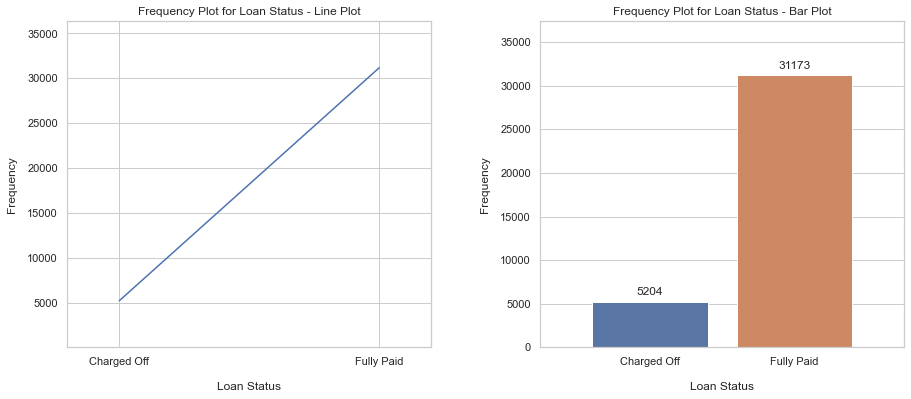

In [52]:
# plotting for loan status column
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title('Frequency Plot for Loan Status - Line Plot')
ax1 = sns.lineplot(data=loan_df['loan_status'].value_counts())
annotate_labels(ax1)
plt.xlabel('Loan Status', labelpad=15)
plt.ylabel('Frequency', labelpad=10)

plt.subplot(1, 2, 2)
plt.title('Frequency Plot for Loan Status - Bar Plot')
ax2 = sns.countplot(x='loan_status', order=loan_df['loan_status'].value_counts().sort_index().index, data=loan_df)
plt.xlabel('Loan Status', labelpad=15)
plt.ylabel('Frequency', labelpad=10)
annotate_labels(ax2)

plt.subplots_adjust(wspace=0.3)
plt.show()

__`Inference`:__<br>
Out of 36377 records, __5204__ are charged off.
##### Home Ownership
Finding the distribution of home ownership column.

In [53]:
# finding the distribution of categories across home_ownership column
home_ownership = loan_df['home_ownership'].value_counts(normalize=True).sort_index() * 100
home_ownership

MORTGAGE   44.50
OTHER       0.25
OWN         7.37
RENT       47.88
Name: home_ownership, dtype: float64

Home ownership against loan status

In [54]:
# Cross tab for getting distribution of home_ownership based on loan_status column
home_ownership_crosstab = pd.crosstab(
    loan_df['loan_status'], loan_df['home_ownership'], values=loan_df['loan_status'], aggfunc='count', normalize='columns'
).applymap(lambda x: 100*x)

home_ownership_crosstab

home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
Charged Off,13.55,19.78,14.40,14.97
Fully Paid,86.45,80.22,85.60,85.03


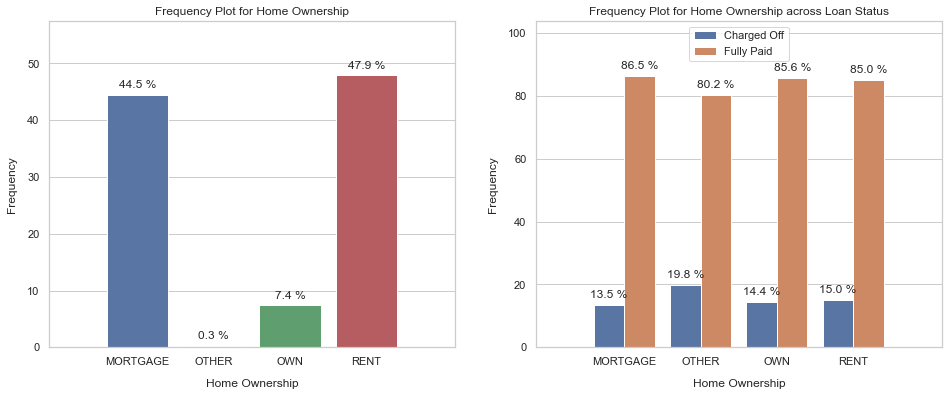

In [55]:
# stacking the home_ownership_crosstab to convert it to a dataframe for plotting 
home_ownership_stacked = home_ownership_crosstab.stack().reset_index().rename(columns={0: 'value'})

# plotting for distribution of home_ownership column
univariate_plot(
    category=0, column_data=home_ownership, figsize_x=16, figsize_y=6, subplot_x=1, subplot_y=2, 
    xlabel="Home Ownership", ylabel="Frequency", x_axis='home_ownership', norm_data=home_ownership_stacked, 
    hue='loan_status', data_frame=loan_df, legend='upper center', hspace=0, wspace=0.20, xlabel_rotation=0, 
    annotate=True, annot_percent=True
)

__`Inference`:__ <br>
- Based on the number of records, we can observe that __majority of the applicants__ belong to ___RENT___ and ___MORTGAGE___ ownership category.
- Considering only the Charged Off, there is no much significant difference among the categories. __The defaulter's rate is seen consistent/constant here__ with 'Others' having the maximum applicants and cannot infer the exact category.
- There is __NO significance__ of `'home_ownership'` variable for analysis.
##### Purpose
Finding the distribution of purpose column.

In [56]:
# finding the distribution of categories across purpose column
purpose_dist = loan_df['purpose'].value_counts(normalize=True).sort_index() * 100
purpose_dist

car                   3.98
credit_card          13.46
debt_consolidation   48.55
home_improvement      7.65
major_purchase        5.70
medical               1.80
moving                1.51
other                10.16
small_business        4.70
wedding               2.51
Name: purpose, dtype: float64

In [57]:
# Cross tab for getting distribution of purpose based on loan_status column
purpose_crosstab = pd.crosstab(
    loan_df['loan_status'], loan_df['purpose'], values=loan_df['loan_status'], aggfunc='count', normalize='columns'
).applymap(lambda x: 100*x)

purpose_crosstab

purpose,car,credit_card,debt_consolidation,home_improvement,major_purchase,medical,moving,other,small_business,wedding
loan_status,,,,,,,,,,
Charged Off,10.65,10.40,15.14,11.79,10.13,15.29,15.27,16.02,27.05,10.09
Fully Paid,89.35,89.60,84.86,88.21,89.87,84.71,84.73,83.98,72.95,89.91


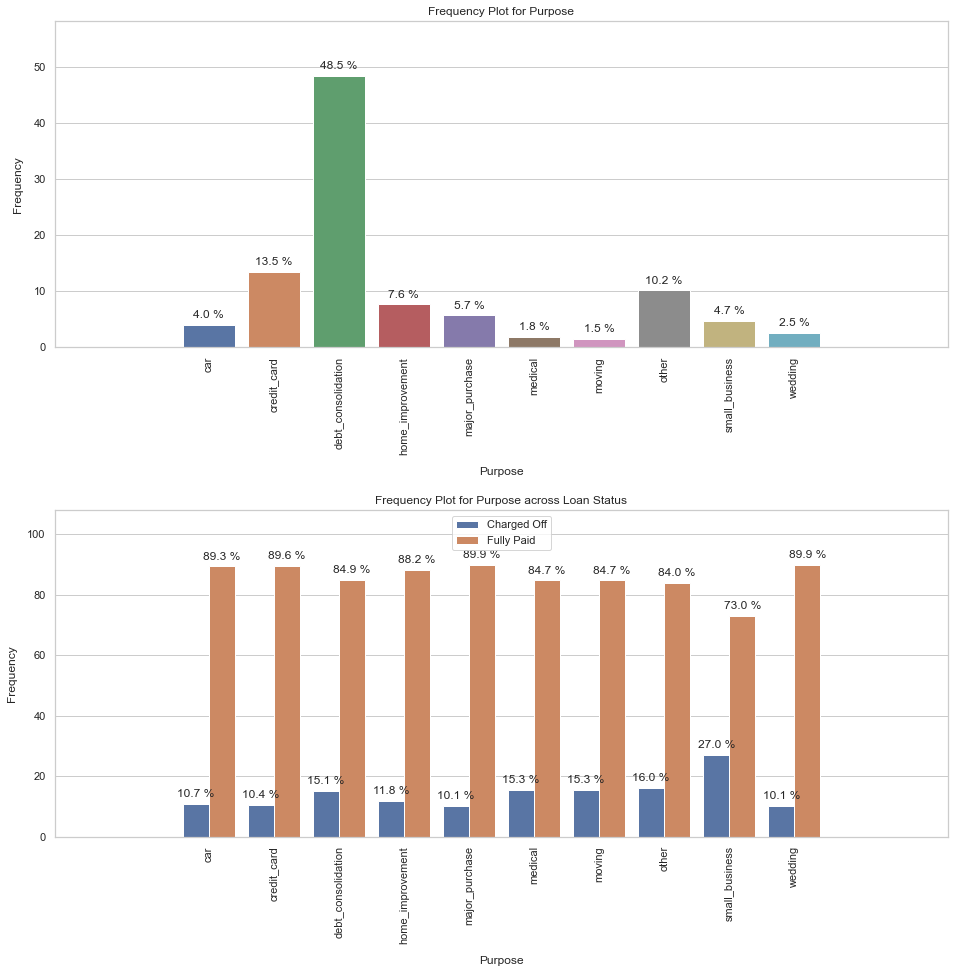

In [58]:
# stacking the purpose_crosstab to convert it to a dataframe for plotting 
purpose_stacked = purpose_crosstab.stack().reset_index().rename(columns={0: 'value'})

# plotting for distribution of purpose column
univariate_plot(
    category=0, column_data=purpose_dist, figsize_x=16, figsize_y=15, subplot_x=2, subplot_y=1, 
    xlabel="Purpose", ylabel="Frequency", x_axis='purpose', norm_data=purpose_stacked, 
    hue='loan_status', data_frame=loan_df, legend='upper center', hspace=0.5, wspace=0, xlabel_rotation=90, 
    annotate=True, annot_percent=True
)

__Inference:__ <br>
- Based on the number of records, we can observe that __majority of the applicants__ stated __debt_consolidation__, __credit_card__ and __other__ as the purpose for loan.
- Considering only Charged Off, the purpose category small_business (27%), other (16%) have the maximum number of charged off applicants. However __considering proportion of loans__ disbursed, __small_businees is too small to be significant__ and hence __`debt_consolidation`__, __`credit_card`__ and __`other`__ have the __maximum Charged Off applicants__.
- The `'purpose'` is a __significant__ variable for analysis.

#### Ordered Categorical variables
##### Term
Finding the distribution of term column.

In [59]:
# finding the distribution of categories across term column
term_dist = loan_df['term'].value_counts(normalize=True).sort_index() * 100
term_dist

36   75.11
60   24.89
Name: term, dtype: float64

In [60]:
# Cross Tab for getting distribution of term based on loan_status column
term_crosstab = pd.crosstab(
    loan_df['loan_status'], loan_df['term'], values=loan_df['loan_status'], aggfunc='count', normalize='columns'
).applymap(lambda x: 100*x)

term_crosstab

term,36,60
loan_status,,
Charged Off,10.76,25.01
Fully Paid,89.24,74.99


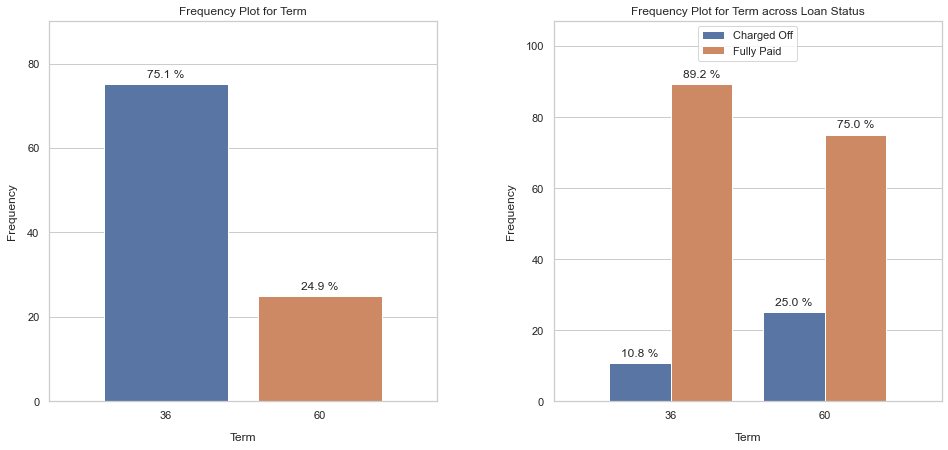

In [61]:
# stacking the purpose_crosstab to convert it to a dataframe for plotting 
term_stacked = term_crosstab.stack().reset_index().rename(columns={0: 'value'})

# plotting for distribution of purpose column
univariate_plot(
    category=0, column_data=term_dist, figsize_x=16, figsize_y=7, subplot_x=1, subplot_y=2, 
    xlabel="Term", ylabel="Frequency", x_axis='term', norm_data=term_stacked, 
    hue='loan_status', data_frame=loan_df, legend='upper center', hspace=0, wspace=0.3, xlabel_rotation=0, 
    annotate=True, annot_percent=True
)

__Inference:__ <br>
- Based on the number of records, we can observe that __majority of the applicants__ chose __36 months (3 years)__ and __60 months (5 years)__ for term.
- Considering only charged off, the term __`60 months (5 years)`__ has the __maximum number of Charged Off applicants__.
- The __`'term'`__ is a __significant__ variable for analysis.
##### Grade
Finding the distribution of grade column. Grades are Lending Club Base Rate + Adjustment for Risk & Volatility.

In [62]:
# finding the distribution of categories across grade column
grade_dist = loan_df['grade'].value_counts(normalize=True).sort_index() * 100
grade_dist

A   25.67
B   30.26
C   20.42
D   13.31
E    6.99
F    2.56
G    0.79
Name: grade, dtype: float64

In [63]:
# Cross Tab for getting distribution of grade based on loan_status column
grade_crosstab = pd.crosstab(
    loan_df['loan_status'], loan_df['grade'], values=loan_df['loan_status'], aggfunc='count', normalize='columns'
).applymap(lambda x: 100*x)

grade_crosstab

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,5.72,11.83,16.77,21.83,26.37,32.37,32.75
Fully Paid,94.28,88.17,83.23,78.17,73.63,67.63,67.25


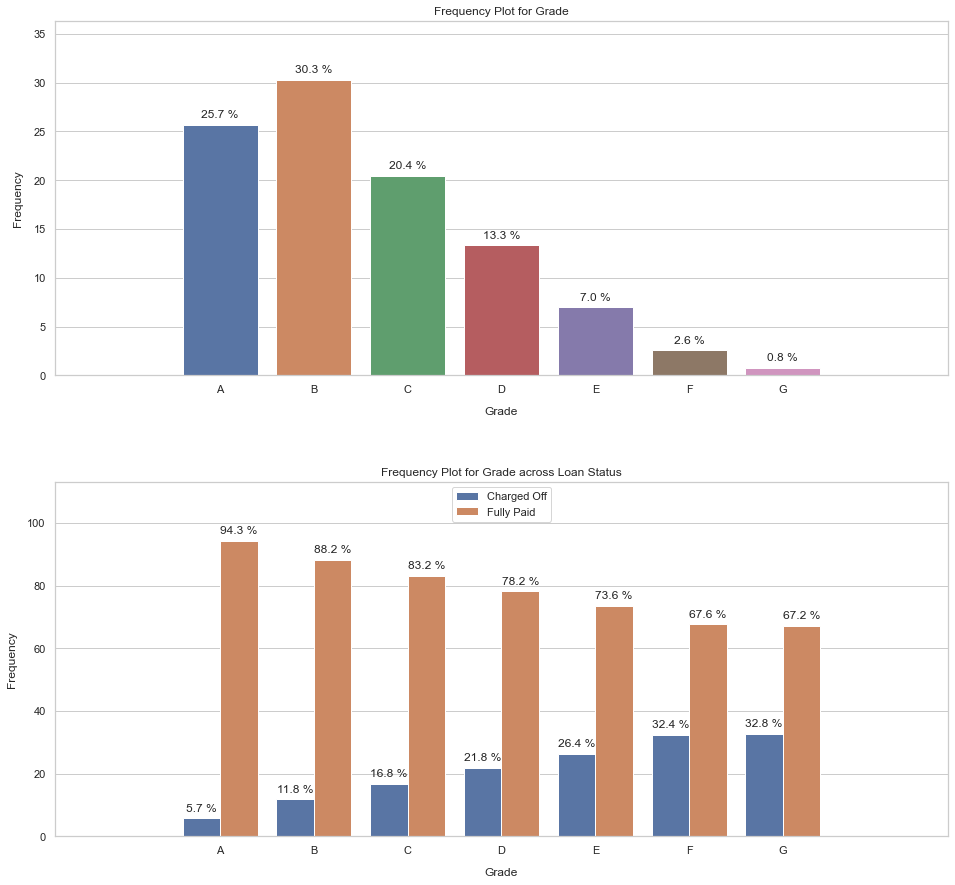

In [64]:
# stacking the grade_crosstab to convert it to a dataframe for plotting 
grade_stacked = grade_crosstab.stack().reset_index().rename(columns={0: 'value'})

# plotting for distribution of grade column
univariate_plot(
    category=0, column_data=grade_dist, figsize_x=16, figsize_y=15, subplot_x=2, subplot_y=1, 
    xlabel="Grade", ylabel="Frequency", x_axis='grade', norm_data=grade_stacked, 
    hue='loan_status', data_frame=loan_df, legend='upper center', hspace=0.3, wspace=0, xlabel_rotation=0, 
    annotate=True, annot_percent=True
)

__Inference:__ <br>
- Based on the number of records, the __maximum number of loans__ disbursed by Lending club was graded as __B, A and C__.
- Considering only charged off, we see an __inverse relationship__ whereas the __grade decreases (A to G)__, the number of __Charged Off applicants increase__. __The maximum defaulters belong to Grades G, F and E__.
- However, __considering the proportion of loans disbursed__, __Grades C, D and E__ have significant number of charged off applicants.
- We can infer that Lending club is using the __correct strategy__ to disburse loans based on the grades and ___`'Grade'` is a significant variable in risk analysis___.

##### Sub-Grade
Finding the distribution of sub_grade column.

In [65]:
# finding the distribution of categories across sub_grade column
sub_grade_dist = loan_df['sub_grade'].value_counts(normalize=True).sort_index() * 100
sub_grade_dist

A1   2.79
A2   3.83
A3   4.63
A4   7.41
A5   7.00
B1   4.57
B2   5.20
B3   7.32
B4   6.35
B5   6.84
C1   5.37
C2   5.01
C3   3.89
C4   3.16
C5   2.99
D1   2.44
D2   3.36
D3   2.91
D4   2.41
D5   2.19
E1   1.92
E2   1.59
E3   1.34
E4   1.12
E5   1.02
F1   0.80
F2   0.60
F3   0.46
F4   0.40
F5   0.29
G1   0.25
G2   0.20
G3   0.12
G4   0.14
G5   0.08
Name: sub_grade, dtype: float64

In [66]:
# Cross Tab for getting distribution of sub_grade based on loan_status column
sub_grade_crosstab = pd.crosstab(
    loan_df['loan_status'], loan_df['sub_grade'], values=loan_df['loan_status'], aggfunc='count', normalize='columns'
).applymap(lambda x: 100*x)

sub_grade_crosstab

sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Charged Off,2.17,4.87,5.22,5.79,7.86,8.85,10.74,11.88,13.12,13.39,15.86,15.84,17.88,17.42,17.85,18.00,20.69,22.40,23.12,25.66,26.69,27.12,22.59,28.33,27.42,28.77,29.09,29.52,35.17,49.53,31.87,35.62,42.22,22.00,32.14
Fully Paid,97.83,95.13,94.78,94.21,92.14,91.15,89.26,88.12,86.88,86.61,84.14,84.16,82.12,82.58,82.15,82.00,79.31,77.60,76.88,74.34,73.31,72.88,77.41,71.67,72.58,71.23,70.91,70.48,64.83,50.47,68.13,64.38,57.78,78.00,67.86


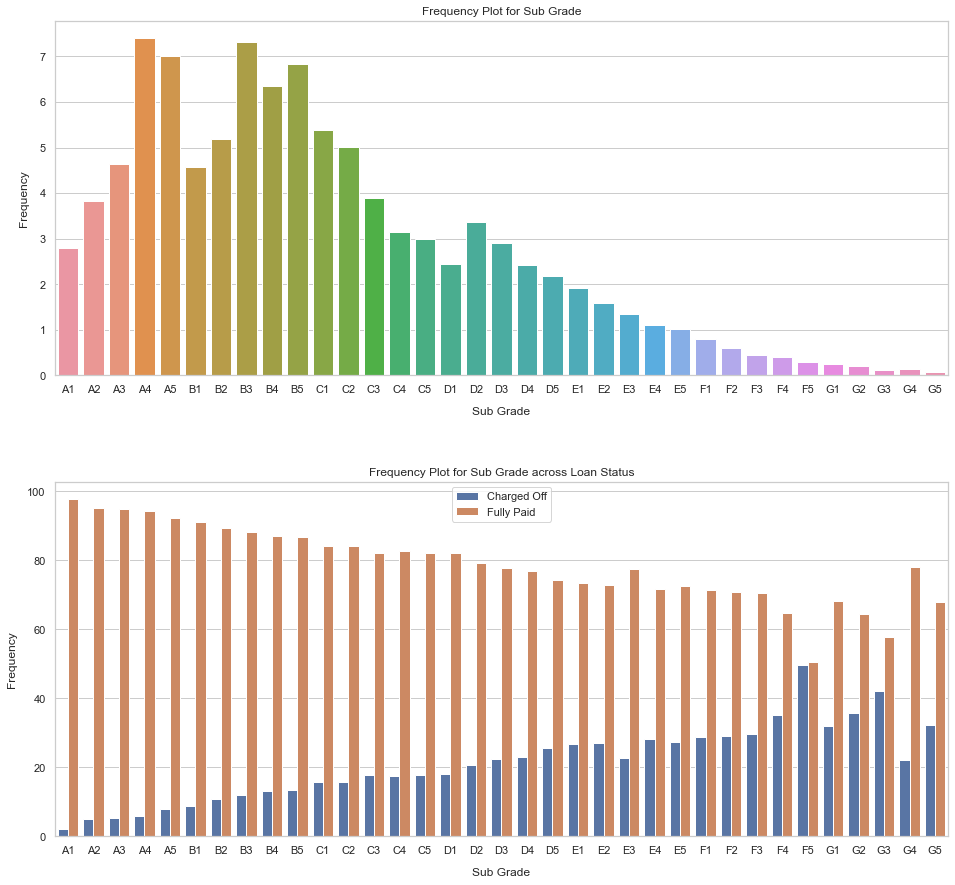

In [67]:
# stacking the sub_grade_crosstab to convert it to a dataframe for plotting 
sub_grade_stacked = sub_grade_crosstab.stack().reset_index().rename(columns={0: 'value'})

# plotting for distribution of grade column
univariate_plot(
    category=0, column_data=sub_grade_dist, figsize_x=16, figsize_y=15, subplot_x=2, subplot_y=1, 
    xlabel="Sub Grade", ylabel="Frequency", x_axis='sub_grade', norm_data=sub_grade_stacked, 
    hue='loan_status', data_frame=loan_df, legend='upper center', hspace=0.3, wspace=0, xlabel_rotation=0, 
    annotate=False, annot_percent=False
)

__Inference:__ <br>
- Based on the number of records, the __maximum number of loans__ disbursed by Lending club belong to __Sub Grades A, B, and C__.
- Considering only charged off, we see an __inverse relationship__ whereas the __grade decreases (A to G)__, the number of __Charged Off applicants increase__. __The maximum defaulters belong to Grades G, F and E__.
- However, __considering the proportion of loans__ disbursed, __Sub Grade B, C and D have the maximum number of Charged Off applicants__.
- We can infer that Lending club is using the __correct strategy__ to disburse loans based on the grades and ___`Grade` is a significant variable in risk analysis___.

##### Employee Length
Finding the distribution of emp_length column.

In [68]:
# finding the distribution of categories across emp_length column
emp_length_dist = loan_df['emp_length'].value_counts(normalize=True).sort_index() * 100
emp_length_dist

0    11.96
1     8.42
2    11.41
3    10.70
4     8.85
5     8.50
6     5.81
7     4.54
8     3.85
9     3.26
10   22.68
Name: emp_length, dtype: float64

In [69]:
# Cross Tab for getting distribution of emp_length based on loan_status column
emp_length_crosstab = pd.crosstab(
    loan_df['loan_status'], loan_df['emp_length'], values=loan_df['loan_status'], aggfunc='count', normalize='columns'
).applymap(lambda x: 100*x)

emp_length_crosstab

emp_length,0,1,2,3,4,5,6,7,8,9,10
loan_status,,,,,,,,,,,
Charged Off,13.99,14.36,13.08,13.82,13.60,14.42,14.05,15.12,14.00,12.89,15.68
Fully Paid,86.01,85.64,86.92,86.18,86.40,85.58,85.95,84.88,86.00,87.11,84.32


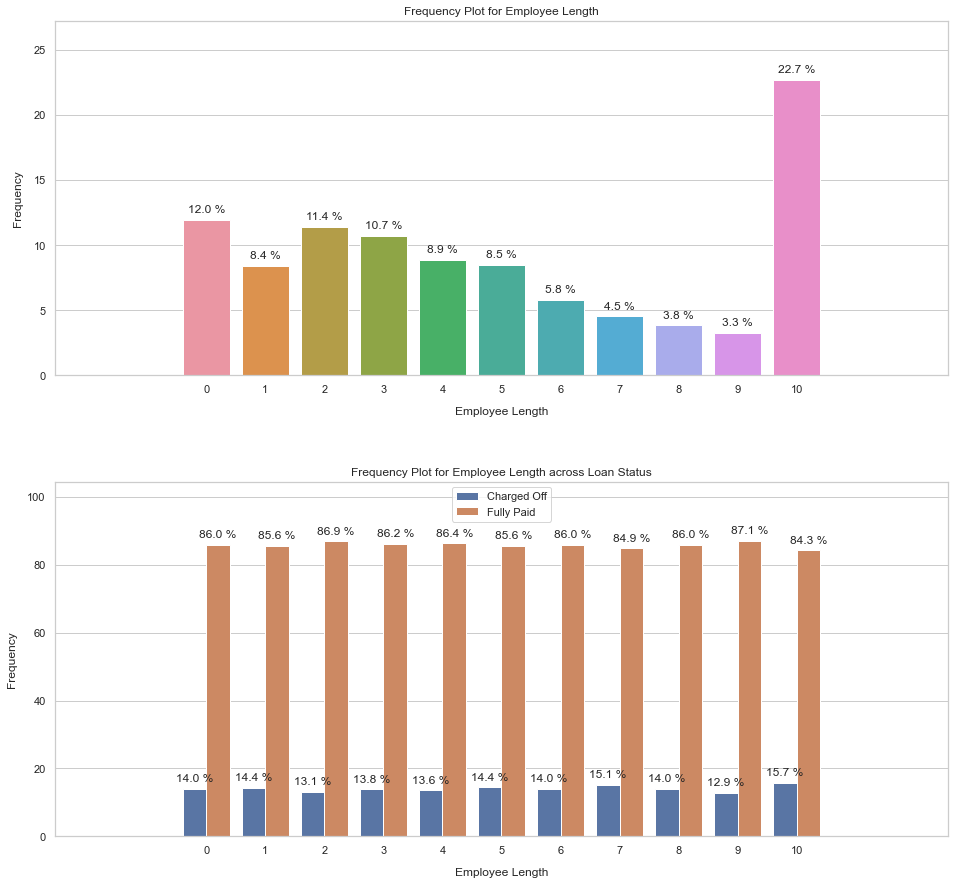

In [70]:
# stacking the emp_length_crosstab to convert it to a dataframe for plotting 
emp_length_stacked = emp_length_crosstab.stack().reset_index().rename(columns={0: 'value'})

# plotting for distribution of grade column
univariate_plot(
    category=0, column_data=emp_length_dist, figsize_x=16, figsize_y=15, subplot_x=2, subplot_y=1, 
    xlabel="Employee Length", ylabel="Frequency", x_axis='emp_length', norm_data=emp_length_stacked, 
    hue='loan_status', data_frame=loan_df, legend='upper center', hspace=0.3, wspace=0, xlabel_rotation=0, 
    annotate=True, annot_percent=True
)

__Inference:__ <br>
- Based on the number of records, the __maximum number of applicants__ belonged to employee length __10+ years__.
- Considering only charged off, there is __NO significant variation__ among the categories of applicants and the rate of Charged off is constant within the range of 12-15%.
- However, __considering the proportion of loans__ disbursed, the __maximum number of Charged Off applicants belongs to 10+ year__ category.
- There variable `'emp_length'` offers __NO significance__ to our analysis.

##### Issue Year
Finding the distribution of issue_year column.

In [71]:
# finding the distribution of categories across issue_year column
issue_year_dist = loan_df['issue_year'].value_counts(normalize=True).sort_index() * 100
issue_year_dist

2007    0.64
2008    4.06
2009   12.24
2010   29.87
2011   53.19
Name: issue_year, dtype: float64

In [72]:
# Cross Tab for getting distribution of issue_year based on loan_status column
issue_year_crosstab = pd.crosstab(
    loan_df['loan_status'], loan_df['issue_year'], values=loan_df['loan_status'], aggfunc='count', normalize='columns'
).applymap(lambda x: 100*x)

issue_year_crosstab

issue_year,2007,2008,2009,2010,2011
loan_status,,,,,
Charged Off,18.45,15.65,12.40,12.39,15.67
Fully Paid,81.55,84.35,87.60,87.61,84.33


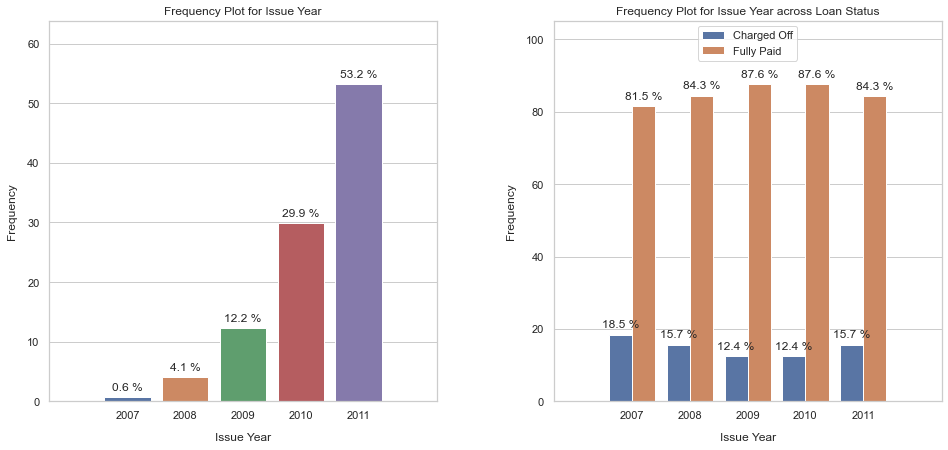

In [73]:
# stacking the issue_year_crosstab to convert it to a dataframe for plotting 
issue_year_stacked = issue_year_crosstab.stack().reset_index().rename(columns={0: 'value'})

# plotting for distribution of grade column
univariate_plot(
    category=0, column_data=issue_year_dist, figsize_x=16, figsize_y=7, subplot_x=1, subplot_y=2, 
    xlabel="Issue Year", ylabel="Frequency", x_axis='issue_year', norm_data=issue_year_stacked, 
    hue='loan_status', data_frame=loan_df, legend='upper center', hspace=0, wspace=0.3, xlabel_rotation=0, 
    annotate=True, annot_percent=True
)

__Inference:__ <br>
- Based on the number of records, the __maximum number of loans disbursed__ by Lending Club was in the year __2011__.
- Considering only Charged Off, there is __NO significant variation__ in the rate of defaulters with respect to the issue year.
- We observe that the year 2007 has the maximum defaulters, however based on the number of loans disbursed, it is __very small to be significant__. Based on the ___number of loans__, year __2011 had the maximum number of charged off applicants__.
- There variable __`'issue_year'`__ offers __NO significance__ to our analysis.

### Quantitative Variables
##### Loan Amount
Finding the distribution of loan_amnt column.

In [74]:
# descriptive statistics for the loan_amnt column
loan_df['loan_amnt'].describe()

count   36377.00
mean    11207.07
std      7352.20
min       500.00
25%      5575.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

In [75]:
# Pivot table with descriptive statistics for the loan_amnt column across loan status
loan_df.pivot_table(values='loan_amnt', index='loan_status', aggfunc={'loan_amnt': 'describe'})

,25%,50%,75%,count,max,mean,min,std
loan_status,,,,,,,,
Charged Off,6000.00,10000.00,17000.00,5204.00,35000.00,12374.91,1000.00,8085.05
Fully Paid,5500.00,9800.00,15000.00,31173.00,35000.00,11012.11,500.00,7204.34


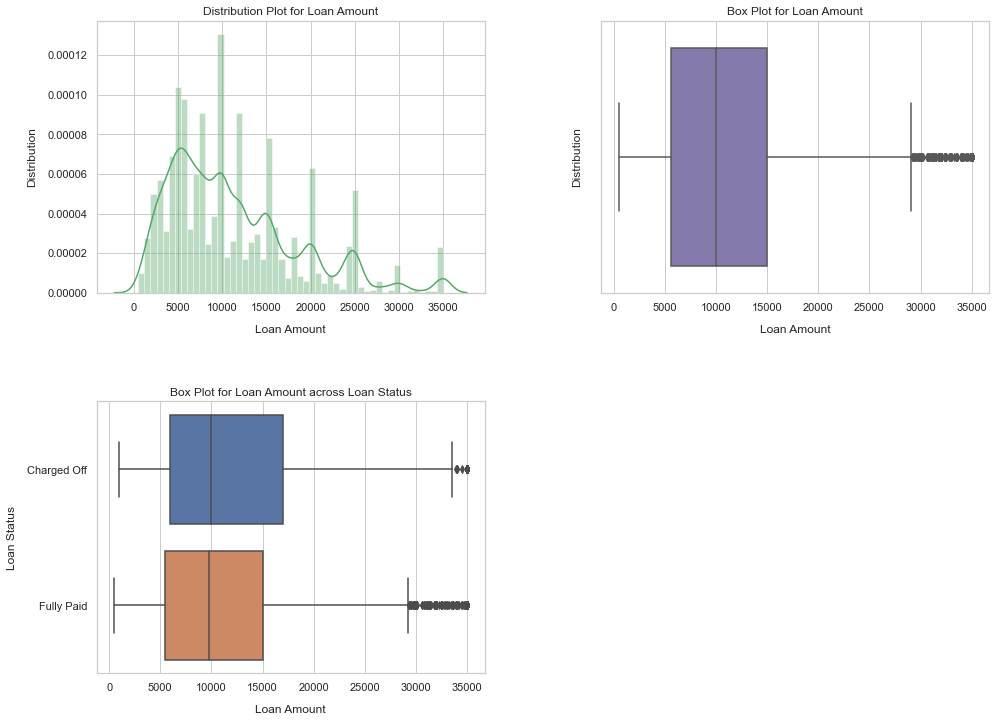

In [76]:
# plotting for distribution of loan_amnt column
univariate_plot(
    category=1, column_data=['Charged Off', 'Fully Paid'], figsize_x=16, figsize_y=12, subplot_x=2, subplot_y=2, 
    xlabel="Loan Amount", ylabel="Distribution", x_axis='loan_amnt', norm_data=None, 
    hue='loan_status', data_frame=loan_df, legend='best', hspace=0.4, wspace=0.3, xlabel_rotation=0, 
    annotate=False, annot_percent=False
)

__Inference:__ <br>
- Based on the analysis, we can observe that the central tendency of loan amount for both loan status is around 10000. Most of the loans granted are below 16000 (75th percentile)
- There are spikes in funding in round amounts inferring that people are funded in rounded amounts like 5000, 10000, 15000, etc.,
- Charged off loans have mean greater i.e., mean is shifted towards the higher average.

Analysing the int_rate column by binning - __Segmented UA__

In [77]:
# creating a bin variable for loan amount
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_lables = ['0-5K', '5K-10K', '10K-15K', '15K-20K', '20K-25K', '25K+']
loan_df['loan_amount_range'] = pd.cut(loan_df['loan_amnt'], bins, labels=bucket_lables)
loan_df['loan_amount_range'].head()

0      0-5K
1      0-5K
2      0-5K
3    5K-10K
5      0-5K
Name: loan_amount_range, dtype: category
Categories (6, object): [0-5K < 5K-10K < 10K-15K < 15K-20K < 20K-25K < 25K+]

In [78]:
# finding the distribution of categories across loan_amount_range column
loan_amount_range_dist = loan_df['loan_amount_range'].value_counts(normalize=True).sort_index() * 100
loan_amount_range_dist

0-5K      23.51
5K-10K    33.23
10K-15K   20.36
15K-20K   11.56
20K-25K    7.54
25K+       3.80
Name: loan_amount_range, dtype: float64

In [79]:
# Cross Tab for getting distribution of loan_amount_range based on loan_status column
loan_amount_range_crosstab = pd.crosstab(
    loan_df['loan_status'], loan_df['loan_amount_range'], values=loan_df['loan_status'], aggfunc='count', normalize='columns'
).applymap(lambda x: 100*x)

loan_amount_range_crosstab

loan_amount_range,0-5K,5K-10K,10K-15K,15K-20K,20K-25K,25K+
loan_status,,,,,,
Charged Off,13.37,12.48,13.46,17.26,18.99,22.34
Fully Paid,86.63,87.52,86.54,82.74,81.01,77.66


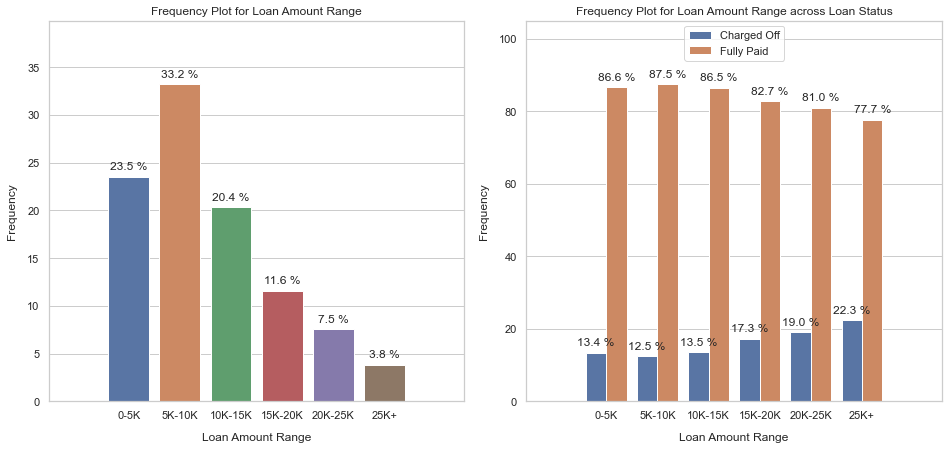

In [80]:
# stacking the loan_amount_range_crosstab to convert it to a dataframe for plotting 
loan_amount_range_stacked = loan_amount_range_crosstab.stack().reset_index().rename(columns={0: 'value'})

# plotting for distribution of grade column
univariate_plot(
    category=0, column_data=loan_amount_range_dist, figsize_x=16, figsize_y=7, subplot_x=1, subplot_y=2, 
    xlabel="Loan Amount Range", ylabel="Frequency", x_axis='loan_amount_range', norm_data=loan_amount_range_stacked, 
    hue='loan_status', data_frame=loan_df, legend='upper center', hspace=0, wspace=0.15, xlabel_rotation=0, 
    annotate=True, annot_percent=True
)

__Inference:__ <br>
- Based on the number of loans disbursed, the range between 5K to 10K was the highly lent bucket
- Considering Charged Off loans, we see an increase in the default rate as the amount increase __thought not significantly high__.
- The __bucket 25K+ has the highest number of charged off applicants__. 
- There variable __`'loan_amount'`__ offers __significant__ value to our analysis.
##### Interest Rate

In [81]:
# descriptive statistics for the int_rate column
loan_df['int_rate'].describe()

count   36377.00
mean       11.97
std         3.69
min         5.42
25%         8.94
50%        11.83
75%        14.42
max        24.11
Name: int_rate, dtype: float64

In [82]:
# Pivot table with descriptive statistics for the int_rate column across loan status
loan_df.pivot_table(values='int_rate', index='loan_status', aggfunc={'int_rate': 'describe'})

,25%,50%,75%,count,max,mean,min,std
loan_status,,,,,,,,
Charged Off,11.48,13.72,16.45,5204.00,24.11,13.90,5.42,3.64
Fully Paid,8.59,11.49,13.99,31173.00,24.11,11.65,5.42,3.60


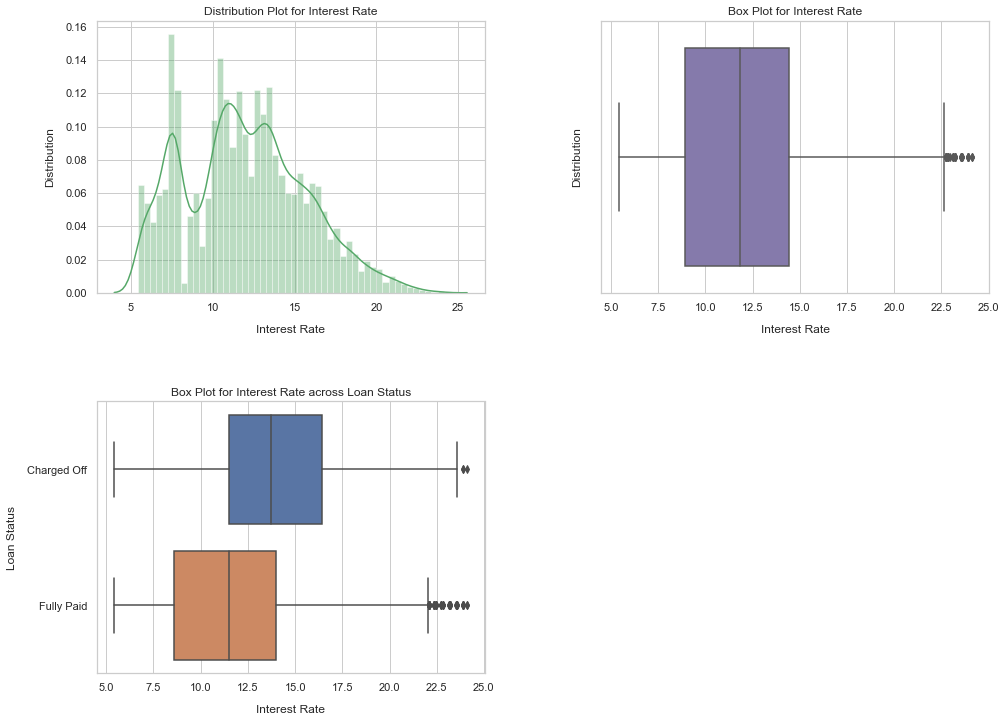

In [83]:
# plotting for distribution of int_rate column
univariate_plot(
    category=1, column_data=['Charged Off', 'Fully Paid'], figsize_x=16, figsize_y=12, subplot_x=2, subplot_y=2, 
    xlabel="Interest Rate", ylabel="Distribution", x_axis='int_rate', norm_data=None, 
    hue='loan_status', data_frame=loan_df, legend='best', hspace=0.4, wspace=0.3, xlabel_rotation=0, 
    annotate=False, annot_percent=False
)

__Inference:__ <br>
- Based on the analysis, the interest rate varies from 5.42 % to 24.11 % with the central tendency interest rate of __11.83 %__.
- The interest rate for Charged Off loans (13.90 %) is higher than for Fully paid (11.65 %). This is expected as the risk increases, the rate of interest imposed also increases.

Analysing the int_rate column by binning - __Segmented UA__

In [84]:
# creating a bin variable for int_rate column
bins = [0, 7.5, 10, 12.5, 15, 100]
bucket_labels = ['0-7.5%', '7.5-10%', '10-12.5%', '12.5-15%', '15+%']
loan_df['int_rate_range'] = pd.cut(loan_df['int_rate'], bins, labels=bucket_labels)
loan_df['int_rate_range'].head()

0    10-12.5%
1        15+%
2        15+%
3    12.5-15%
5     7.5-10%
Name: int_rate_range, dtype: category
Categories (5, object): [0-7.5% < 7.5-10% < 10-12.5% < 12.5-15% < 15+%]

In [85]:
# finding the distribution of categories across int_rate_range column
int_rate_range_dist = loan_df['int_rate_range'].value_counts(normalize=True).sort_index() * 100
int_rate_range_dist

0-7.5%     13.64
7.5-10%    17.81
10-12.5%   24.40
12.5-15%   23.22
15+%       20.93
Name: int_rate_range, dtype: float64

In [86]:
# Cross Tab for getting distribution of int_rate_range based on loan_status column
int_rate_range_crosstab = pd.crosstab(
    loan_df['loan_status'], loan_df['int_rate_range'], values=loan_df['loan_status'], aggfunc='count', normalize='columns'
).applymap(lambda x: 100*x)

int_rate_range_crosstab

int_rate_range,0-7.5%,7.5-10%,10-12.5%,12.5-15%,15+%
loan_status,,,,,
Charged Off,4.47,7.86,12.81,16.20,25.85
Fully Paid,95.53,92.14,87.19,83.80,74.15


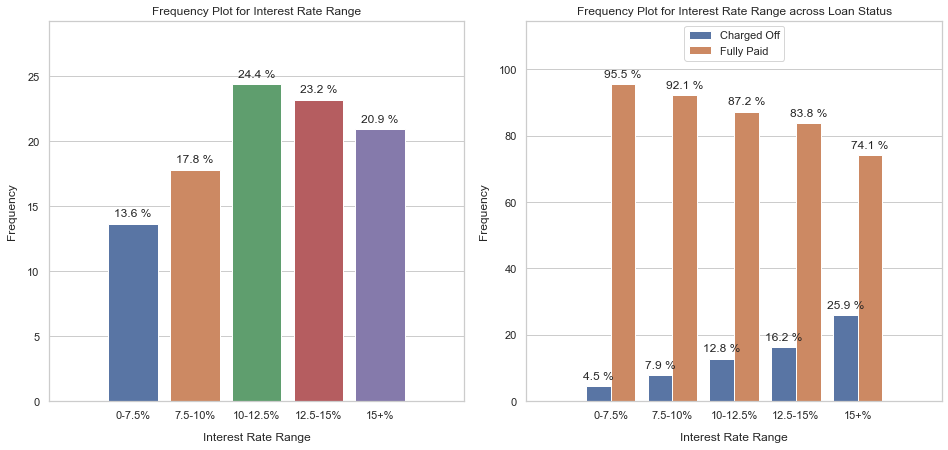

In [87]:
# stacking the int_rate_range_crosstab to convert it to a dataframe for plotting 
int_rate_range_stacked = int_rate_range_crosstab.stack().reset_index().rename(columns={0: 'value'})

# plotting for distribution of grade column
univariate_plot(
    category=0, column_data=int_rate_range_dist, figsize_x=16, figsize_y=7, subplot_x=1, subplot_y=2, 
    xlabel="Interest Rate Range", ylabel="Frequency", x_axis='int_rate_range', norm_data=int_rate_range_stacked, 
    hue='loan_status', data_frame=loan_df, legend='upper center', hspace=0, wspace=0.15, xlabel_rotation=0, 
    annotate=True, annot_percent=True
)

__Inference:__ <br>
- Based on the number of loans disbursed, the interest range between __10-15%__ was the most lent rate contributing to 47% of the loans disbursed.
- Considering Charged Off loans, we see an __increase in the default rate__ as the __interest rate increase__ which is __significant__.
- The __Interest rate bucket 15+ has the highest number of charged off applicants__. 
- There variable __`'int_rate'`__ offers __significant__ value to our analysis.
##### Annual Income

In [88]:
# descriptive statistics for the annual_inc column
loan_df['annual_inc'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count     36377.00
mean      69542.83
std       64960.93
min        4080.00
10%       30000.00
25%       41500.00
50%       60000.00
75%       83000.00
90%      117000.00
99%      234996.96
max     6000000.00
Name: annual_inc, dtype: float64

We can observe the presence of outliers which might skew our analysis. Hence proceedint to drop the outliers. <br>
We will retain the values within +3 to -3 standard deviation

In [89]:
# Getting rid of outliers in annual_inc column by retaining data within +3 to -3 standard deviations
annual_amt_data = loan_df[np.abs(loan_df['annual_inc']-loan_df['annual_inc'].mean()) <= (3*loan_df['annual_inc'].std())]
annual_amt_data['annual_inc'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count    36115.00
mean     66574.85
std      36357.82
min       4080.00
10%      30000.00
25%      41004.00
50%      60000.00
75%      82000.00
90%     114560.00
99%     200000.00
max     264000.00
Name: annual_inc, dtype: float64

In [90]:
# Pivot table with descriptive statistics for the annual_inc column across loan status
annual_amt_data.pivot_table(values='annual_inc', index='loan_status', aggfunc={'annual_inc': 'describe'})

,25%,50%,75%,count,max,mean,min,std
loan_status,,,,,,,,
Charged Off,38400.00,54000.00,75000.00,5176.00,254616.00,61342.35,4080.00,33911.22
Fully Paid,42000.00,60000.00,84000.00,30939.00,264000.00,67450.23,4800.00,36678.93


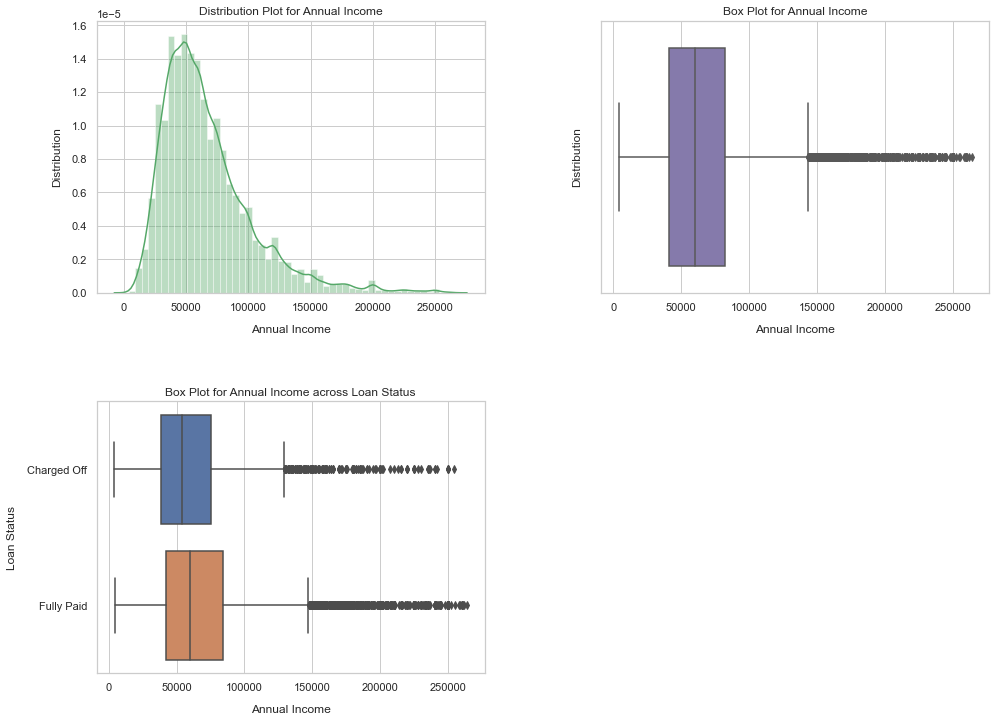

In [91]:
# plotting for distribution of annual_inc column
univariate_plot(
    category=1, column_data=['Charged Off', 'Fully Paid'], figsize_x=16, figsize_y=12, subplot_x=2, subplot_y=2, 
    xlabel="Annual Income", ylabel="Distribution", x_axis='annual_inc', norm_data=None, 
    hue='loan_status', data_frame=annual_amt_data, legend='best', hspace=0.4, wspace=0.3, xlabel_rotation=0, 
    annotate=False, annot_percent=False
)

__Inference:__ <br>
- Based on the analysis, the annual income is observed to be the highest at 50000 and the central tendency is __60000__ with lower (25th percentile) income being 41000 and higher (75th percentile) being 82000.
- The annual income for Charged Off loans is lower compared to the higher income. This implies that the applicants of lower income group are show the behaviour charge off.

Analysing the annual_inc column by binning - __Segmented UA__

In [92]:
# creating a bin variable for annual_inc column
bins = [0, 20000, 40000, 60000, 80000, 100000]
bucket_label = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
annual_amt_data['income_bin'] = pd.cut(annual_amt_data['annual_inc'], bins, labels=bucket_label)
annual_amt_data['income_bin'].head()

0    25000-50000
1    25000-50000
2        0-25000
3    50000-75000
5    25000-50000
Name: income_bin, dtype: category
Categories (5, object): [0-25000 < 25000-50000 < 50000-75000 < 75000-100000 < 100000+]

In [93]:
# finding the distribution of categories across annual_inc bins (income_bin) column
income_bin_dist = annual_amt_data['income_bin'].value_counts(normalize=True).sort_index() * 100
income_bin_dist

0-25000         2.96
25000-50000    25.17
50000-75000    34.43
75000-100000   23.47
100000+        13.97
Name: income_bin, dtype: float64

In [94]:
# Cross Tab for getting distribution of income_bin based on loan_status column
income_bin_crosstab = pd.crosstab(
    annual_amt_data['loan_status'], annual_amt_data['income_bin'], values=loan_df['loan_status'], aggfunc='count', normalize='columns'
).applymap(lambda x: 100*x)

income_bin_crosstab

income_bin,0-25000,25000-50000,50000-75000,75000-100000,100000+
loan_status,,,,,
Charged Off,18.57,17.37,15.19,13.32,11.69
Fully Paid,81.43,82.63,84.81,86.68,88.31


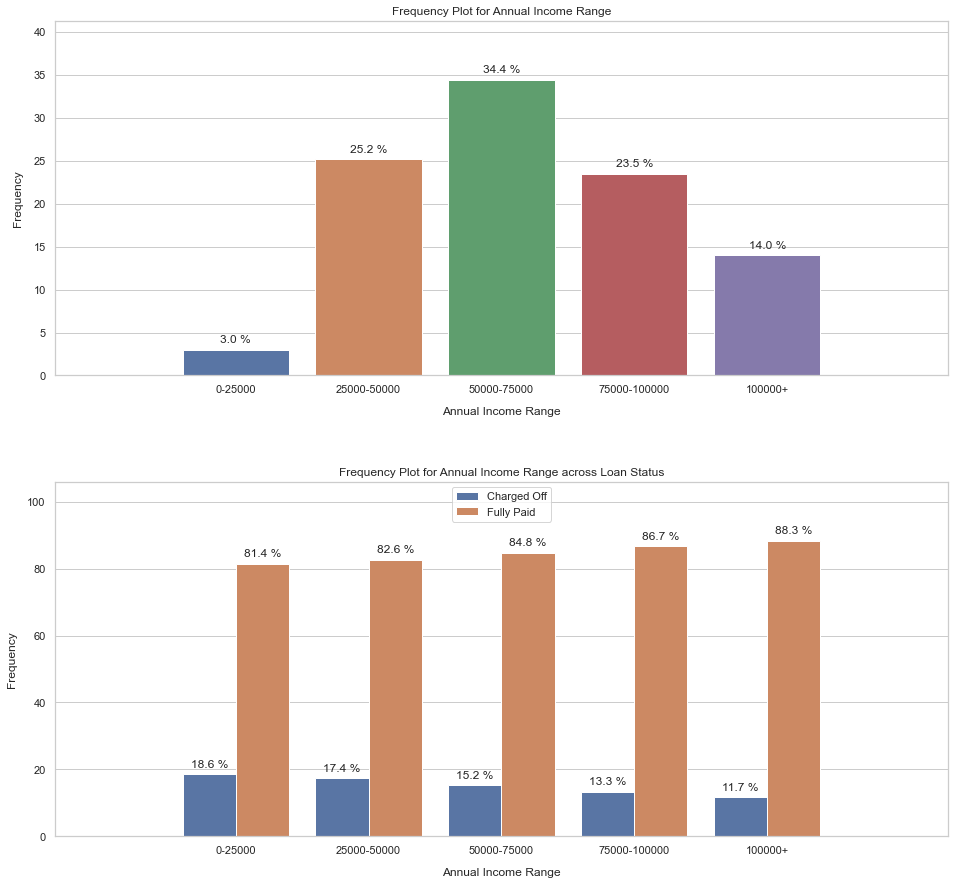

In [95]:
# stacking the income_bin_crosstab to convert it to a dataframe for plotting 
income_bin_stacked = income_bin_crosstab.stack().reset_index().rename(columns={0: 'value'})

# plotting for distribution of grade column
univariate_plot(
    category=0, column_data=income_bin_dist, figsize_x=16, figsize_y=15, subplot_x=2, subplot_y=1, 
    xlabel="Annual Income Range", ylabel="Frequency", x_axis='income_bin', norm_data=income_bin_stacked, 
    hue='loan_status', data_frame=annual_amt_data, legend='upper center', hspace=0.3, wspace=0, xlabel_rotation=0, 
    annotate=True, annot_percent=True
)

__Inference:__ <br>
- Based on the number of loans disbursed, the loans were disbursed to the applicants between range __50K to 75K__.
- Considering Charged Off loans, we see an __decrease__ in defaulting as the __income range increase__ which is a linear decrease.
- There variable __`'annual_inc'`__ offers __significant__ value to our analysis.
##### Debt to Income - DTI

In [96]:
# descriptive statistics for the dti column
loan_df['dti'].describe()

count   36377.00
mean       13.35
std         6.65
min         0.00
25%         8.23
50%        13.45
75%        18.60
max        29.99
Name: dti, dtype: float64

In [97]:
# Pivot table with descriptive statistics for the dti column across loan status
loan_df.pivot_table(values='dti', index='loan_status', aggfunc={'dti': 'describe'})

,25%,50%,75%,count,max,mean,min,std
loan_status,,,,,,,,
Charged Off,9.13,14.39,19.30,5204.00,29.85,14.05,0.00,6.55
Fully Paid,8.09,13.28,18.45,31173.00,29.99,13.23,0.00,6.65


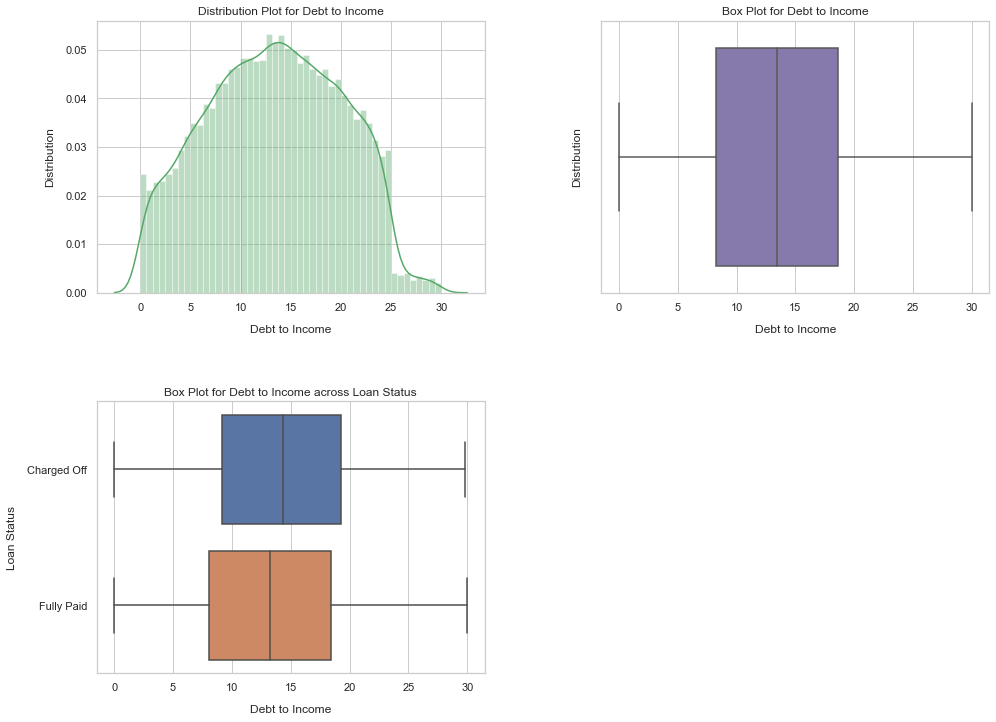

In [98]:
# plotting for distribution of dti column
univariate_plot(
    category=1, column_data=['Charged Off', 'Fully Paid'], figsize_x=16, figsize_y=12, subplot_x=2, subplot_y=2, 
    xlabel="Debt to Income", ylabel="Distribution", x_axis='dti', norm_data=None, 
    hue='loan_status', data_frame=loan_df, legend='best', hspace=0.4, wspace=0.3, xlabel_rotation=0, 
    annotate=False, annot_percent=False
)

__Inference:__ <br>
- Based on the analysis, we observe a broader bell curve indicating the dti ratio is maximum around 12-15 % with the central tendency at __13.45 %__.
- The dti ratio for Charged Off loans (14.49 %) is higher than for Fully paid (13.28 %).

Analysing the dti column by binning - __Segmented UA__

In [99]:
# creating a bin variable for dti column
bins = [0, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_label = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
loan_df['dti_range'] = pd.cut(loan_df['dti'], bins, labels=bucket_label)
loan_df[["loan_amount_range", "int_rate_range", "dti_range"]].head()

,loan_amount_range,int_rate_range,dti_range
0,0-5K,10-12.5%,25%+
1,0-5K,15+%,0-5%
2,0-5K,15+%,5-10%
3,5K-10K,12.5-15%,15-20%
5,0-5K,7.5-10%,10-15%


In [100]:
# finding the distribution of categories across dti_range column
dti_range_dist = loan_df['dti_range'].value_counts(normalize=True).sort_index() * 100
dti_range_dist

0-5%     12.38
5-10%    20.43
10-15%   25.14
15-20%   23.15
20-25%   17.29
25%+      1.60
Name: dti_range, dtype: float64

In [101]:
# Cross Tab for getting distribution of int_rate_range based on loan_status column
dti_range_crosstab = pd.crosstab(
    loan_df['loan_status'], loan_df['dti_range'], values=loan_df['loan_status'], aggfunc='count', normalize='columns'
).applymap(lambda x: 100*x)

dti_range_crosstab

dti_range,0-5%,5-10%,10-15%,15-20%,20-25%,25%+
loan_status,,,,,,
Charged Off,12.09,12.62,14.14,15.51,16.65,12.91
Fully Paid,87.91,87.38,85.86,84.49,83.35,87.09


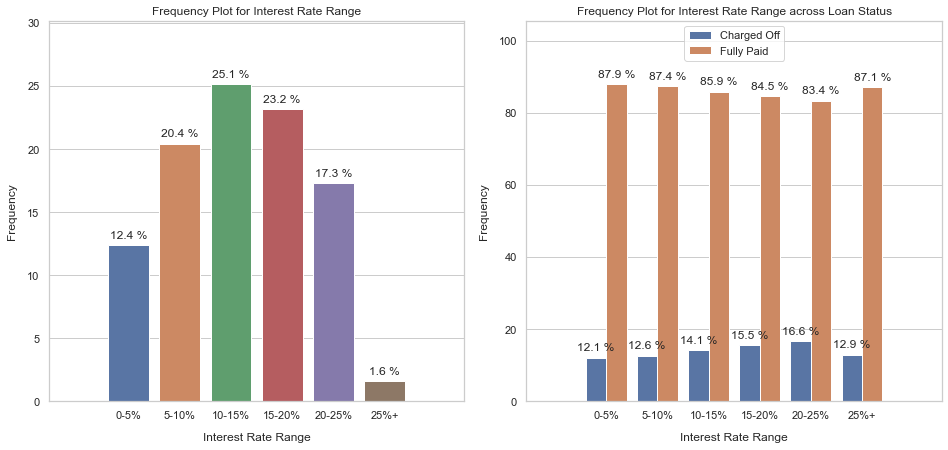

In [102]:
# stacking the int_rate_range_crosstab to convert it to a dataframe for plotting 
dti_range_stacked = dti_range_crosstab.stack().reset_index().rename(columns={0: 'value'})

# plotting for distribution of grade column
univariate_plot(
    category=0, column_data=dti_range_dist, figsize_x=16, figsize_y=7, subplot_x=1, subplot_y=2, 
    xlabel="Interest Rate Range", ylabel="Frequency", x_axis='dti_range', norm_data=dti_range_stacked, 
    hue='loan_status', data_frame=loan_df, legend='upper center', hspace=0, wspace=0.15, xlabel_rotation=0, 
    annotate=True, annot_percent=True
)

__Inference:__ <br>
- Based on the analysis, the dti range is maximum for the range __10-20 %__ among the applicants
- Considering Charged Off loans, we see an __increase__ in the default rate as the __dti range increases__. this implies that Higher he DTI range, chances are the loans being charged off.
- There variable __`'dti'`__ offers __significant__ value to our analysis.
##### Ratio of Loan to Income

In [103]:
# descriptive statistics for the loan_income_ratio column
loan_df['loan_income_ratio'].describe()

count   36377.00
mean        0.19
std         0.11
min         0.00
25%         0.10
50%         0.16
75%         0.25
max         0.83
Name: loan_income_ratio, dtype: float64

In [104]:
# Pivot table with descriptive statistics for the loan_income_ratio column across loan status
loan_df.pivot_table(values='loan_income_ratio', index='loan_status', aggfunc={'loan_income_ratio': 'describe'})

,25%,50%,75%,count,max,mean,min,std
loan_status,,,,,,,,
Charged Off,0.12,0.20,0.30,5204.00,0.82,0.22,0.01,0.13
Fully Paid,0.10,0.16,0.24,31173.00,0.83,0.18,0.00,0.11


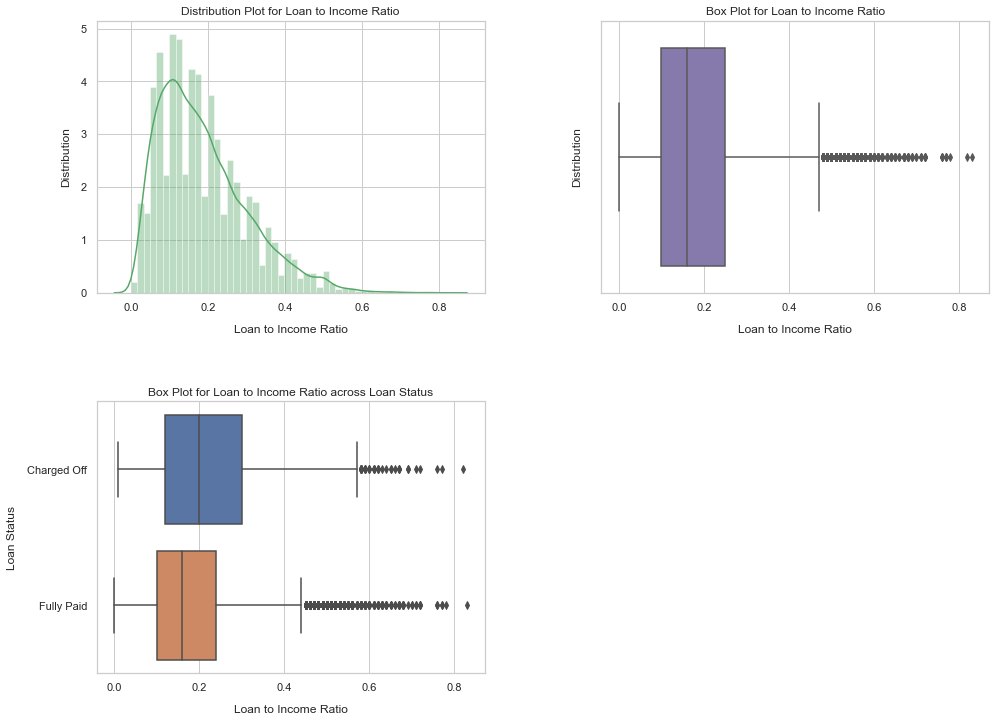

In [105]:
# plotting for distribution of loan_income_ratio column
univariate_plot(
    category=1, column_data=['Charged Off', 'Fully Paid'], figsize_x=16, figsize_y=12, subplot_x=2, subplot_y=2, 
    xlabel="Loan to Income Ratio", ylabel="Distribution", x_axis='loan_income_ratio', norm_data=None, 
    hue='loan_status', data_frame=loan_df, legend='best', hspace=0.4, wspace=0.3, xlabel_rotation=0, 
    annotate=False, annot_percent=False
)

__Inference:__ <br>
- Based on the analysis, the loan to income ratio is maximum between __10-20 %__ among the applicants
- As long as the loan amount is less than 20% of the annual income, the default rate is low.
- There variable __`'loan_income_ratio'`__ offers __significant__ value to our analysis.

### Bivariate Analysis

In [106]:
# lets look at the columns of the loan_df dataframe
loan_df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year,loan_income_ratio,loan_amount_range,int_rate_range,dti_range
0,5000,5000,4975.00,36,10.65,162.87,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,Computer,27.65,1985-01-01,1,3,0,13648,83.70,9,12,2011,1,1985,0.21,0-5K,10-12.5%,25%+
1,2500,2500,2500.00,60,15.27,59.83,C,C4,0,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,bike,1.00,1999-04-01,5,3,0,1687,9.40,4,12,2011,4,1999,0.08,0-5K,15+%,0-5%


Defining a function to plot bivariate analysis.

In [107]:
# Function to plot for Bivariate Analysis
def bivariate_plot(figsize_x, figsize_y, subplot_x, subplot_y, xlabel, ylabel, 
                   x_axis, y_axis, hspace, wspace, xlabel_rotation=0, annotate=False, annot_percent=False):
    """
    figsize_x        : The width of the plot figure
    figsize_y        : The height of the plot figure
    subplot_x        : The rows for the subplot
    subplot_y        : The columns for the subplot
    xlabel           : The x-axis label for the plot
    ylabel           : The y-axis label for the plot
    x_axis           : The series/variable to be plotted along the x-axis
    y_axis           : The series/variable to be plotted along the y-axis
    hspace           : The amount of height reserved for space between subplots
    wspace           : The amount of width reserved for space between subplots
    xlabel_rotation  : The degree of rotation for the x-axis ticks (values)
    annotate         : To annotate the plots or not (Boolean - Yes or No)
    annot_percent    : Mark annotation as percentage (Boolean - Yes or No)
    
    returns          :  None
    """
    legend = 'best'
    plt.figure(figsize=(figsize_x, figsize_y))
    
    # First Subplot - Bar Plot
    plt.subplot(subplot_x, subplot_y, 1)
    ax1 = sns.barplot(x=x_axis, y=y_axis, estimator=np.median, palette='rainbow')
    title = "Bar Plot - " + xlabel
    if annotate:
        annotate_labels(ax1, annot_percent)
    set_plot_labels(title, xlabel, ylabel, xlabel_rotation, False, legend)
    
    # Second Subplot - Joint Plot
    plt.subplot(subplot_x, subplot_y, 2) 
    sns.lineplot(data=y_axis, estimator=np.median, color='maroon')
    ax2 = sns.barplot(x=x_axis, y=y_axis, estimator=np.median, palette='rainbow')
    title = "Joint Plot - " + xlabel
    if annotate:
        annotate_labels(ax2, annot_percent)
    set_plot_labels(title, xlabel, ylabel, xlabel_rotation, False, legend)
    
    plt.subplots_adjust(hspace = hspace)
    plt.subplots_adjust(wspace = wspace)
    plt.show()

#### Categorical Varaibles - Bivariate Analysis
##### Home Ownership and Funded Amount against Charged Off Rate

In [108]:
# pivot table for home ownership and funded amount
df1 = loan_df.pivot_table(
    values='funded_amnt', index='home_ownership', columns='loan_status', aggfunc=np.count_nonzero, fill_value=0,
    margins=True, margins_name='Total'
)
df1

loan_status,Charged Off,Fully Paid,Total
home_ownership,,,
MORTGAGE,2193,13995,16188
OTHER,18,73,91
OWN,386,2294,2680
RENT,2607,14811,17418
Total,5204,31173,36377


In [109]:
# creating charged_off_rate column
df1['charged_off_rate'] = 100 * (round((df1['Charged Off'] / df1['Total']), 6))
df1.describe()

loan_status,Charged Off,Fully Paid,Total,charged_off_rate
count,5.00,5.00,5.00,5.00
mean,2081.60,12469.20,14550.80,15.40
std,2071.92,12398.03,14467.95,2.50
min,18.00,73.00,91.00,13.55
25%,386.00,2294.00,2680.00,14.31
50%,2193.00,13995.00,16188.00,14.40
75%,2607.00,14811.00,17418.00,14.97
max,5204.00,31173.00,36377.00,19.78


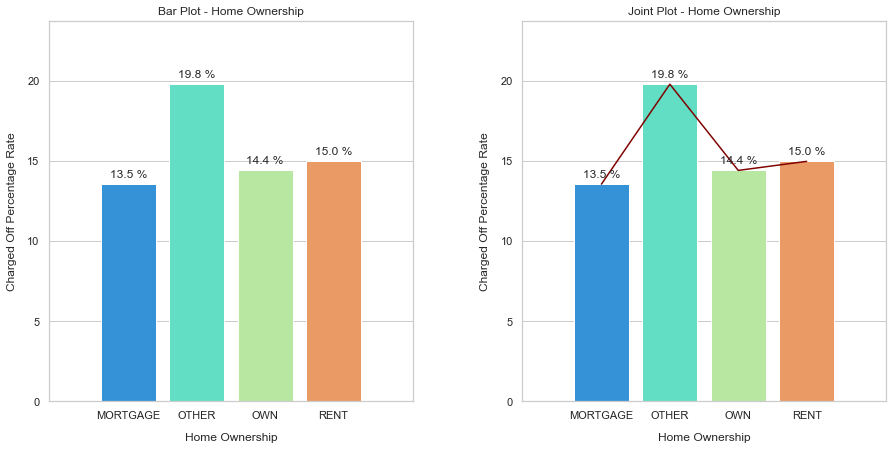

In [110]:
# Getting index and values excluding 'Total'column
x_data = df1.iloc[0:-1].index
y_data = df1.iloc[0:-1]['charged_off_rate']

# plotting for the bivariate variables
bivariate_plot(
    figsize_x=15, figsize_y=7, subplot_x=1, subplot_y=2, xlabel='Home Ownership', ylabel='Charged Off Percentage Rate', 
    x_axis=x_data, y_axis=y_data, hspace=0, wspace=0.3, xlabel_rotation=0, annotate=True, annot_percent=True
)

__Inference:__ <br>
Based on the analysis, the top 3 home ownership of borrowers with respect to charged off rate are:
- Other
- Rent
- Own

##### Purpose and Funded Amount against Charged Off Rate

In [111]:
# pivot table for purpose and funded amount
df2 = loan_df.pivot_table(
    values='funded_amnt', index='purpose', columns='loan_status', aggfunc=np.count_nonzero, fill_value=0,
    margins=True, margins_name='Total'
)
df2

loan_status,Charged Off,Fully Paid,Total
purpose,,,
car,154,1292,1446
credit_card,509,4387,4896
debt_consolidation,2673,14987,17660
home_improvement,328,2454,2782
major_purchase,210,1863,2073
medical,100,554,654
moving,84,466,550
other,592,3104,3696
small_business,462,1246,1708


In [112]:
# creating charged_off_rate column
df2['charged_off_rate'] = 100 * (round((df2['Charged Off'] / df2['Total']), 6))
df2.describe()

loan_status,Charged Off,Fully Paid,Total,charged_off_rate
count,11.00,11.00,11.00,11.00
mean,946.18,5667.82,6614.00,14.19
std,1593.82,9411.65,11000.93,4.88
min,84.00,466.00,550.00,10.09
25%,127.00,1033.00,1179.00,10.52
50%,328.00,1863.00,2073.00,14.31
75%,550.50,3745.50,4296.00,15.28
max,5204.00,31173.00,36377.00,27.05


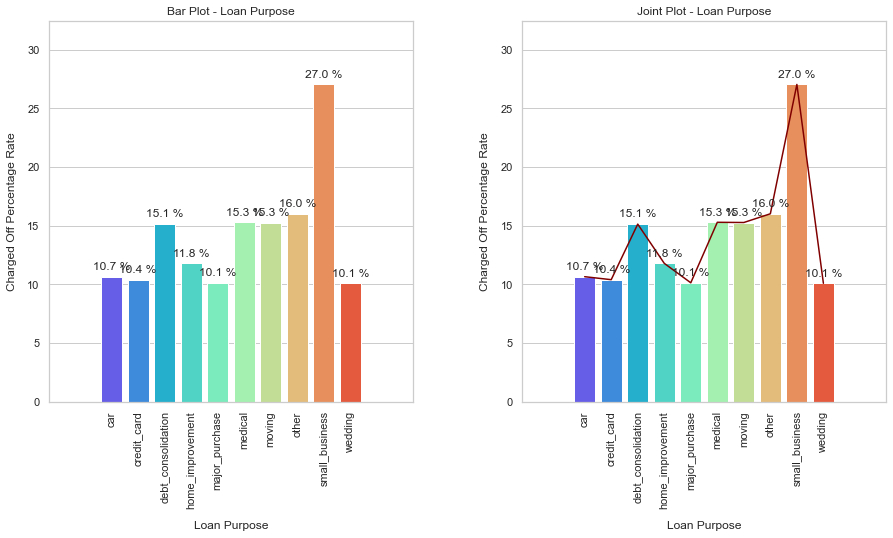

In [113]:
# Getting index and values excluding 'Total'column
x_data = df2.iloc[0:-1].index
y_data = df2.iloc[0:-1]['charged_off_rate']

# plotting for the bivariate variables
bivariate_plot(
    figsize_x=15, figsize_y=7, subplot_x=1, subplot_y=2, xlabel='Loan Purpose', ylabel='Charged Off Percentage Rate', 
    x_axis=x_data, y_axis=y_data, hspace=0, wspace=0.3, xlabel_rotation=90, annotate=True, annot_percent=True
)

__Inference:__ <br>
Based on the analysis, the top 3 home ownership of borrowers with respect to charged off rate are (Considering proportionate values instead of absolute):
- debt_consolidation
- credit_card
- Other

By Considering absolute data:
- small_business
- renewable_energy
- educational

##### Grade and Funded Amount against Charged Off Rate

In [114]:
# pivot table for grade and funded amount
df3 = loan_df.pivot_table(
    values='funded_amnt', index='grade', columns='loan_status', aggfunc=np.count_nonzero, fill_value=0,
    margins=True, margins_name='Total'
)
df3

loan_status,Charged Off,Fully Paid,Total
grade,,,
A,534,8804,9338
B,1302,9707,11009
C,1246,6183,7429
D,1057,3786,4843
E,670,1871,2541
F,301,629,930
G,94,193,287
Total,5204,31173,36377


In [115]:
# creating charged_off_rate column
df3['charged_off_rate'] = 100 * (round((df3['Charged Off'] / df3['Total']), 6))
df3.describe()

loan_status,Charged Off,Fully Paid,Total,charged_off_rate
count,8.00,8.00,8.00,8.00
mean,1301.00,7793.25,9094.25,20.24
std,1636.17,10100.29,11686.92,9.80
min,94.00,193.00,287.00,5.72
25%,475.75,1560.50,2138.25,13.69
50%,863.50,4984.50,6136.00,19.30
75%,1260.00,9029.75,9755.75,27.87
max,5204.00,31173.00,36377.00,32.75


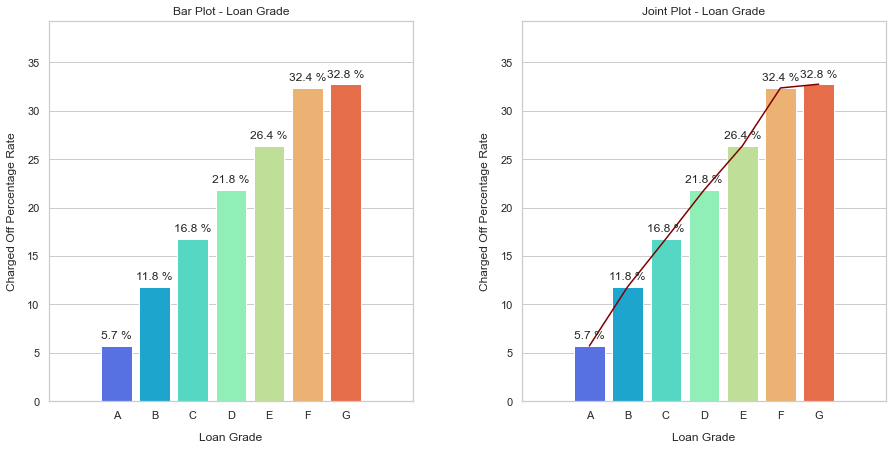

In [116]:
# Getting index and values excluding 'Total'column
x_data = df3.iloc[0:-1].index
y_data = df3.iloc[0:-1]['charged_off_rate']

# plotting for the bivariate variables
bivariate_plot(
    figsize_x=15, figsize_y=7, subplot_x=1, subplot_y=2, xlabel='Loan Grade', ylabel='Charged Off Percentage Rate', 
    x_axis=x_data, y_axis=y_data, hspace=0, wspace=0.3, xlabel_rotation=0, annotate=True, annot_percent=True
)

__Inference:__ <br>
Based on the analysis, the top 3 grades of loans with respect to charged off rate are (Considering proportionate values instead of absolute):
- B
- C
- D

Considering Absolute values, we observe that as the grade decreases (A to G), Charged Off rate increases.

##### Sub-Grade and Funded Amount against Charged Off Rate

In [117]:
# pivot table for sub_grade and funded amount
df4 = loan_df.pivot_table(
    values='funded_amnt', index='sub_grade', columns='loan_status', aggfunc=np.count_nonzero, fill_value=0,
    margins=True, margins_name='Total'
)
df4

loan_status,Charged Off,Fully Paid,Total
sub_grade,,,
A1,22,994,1016
A2,68,1327,1395
A3,88,1598,1686
A4,156,2539,2695
A5,200,2346,2546
B1,147,1514,1661
B2,203,1687,1890
B3,316,2345,2661
B4,303,2007,2310


In [118]:
# creating charged_off_rate column
df4['charged_off_rate'] = 100 * (round((df4['Charged Off'] / df4['Total']), 6))
df4.describe()

loan_status,Charged Off,Fully Paid,Total,charged_off_rate
count,36.00,36.00,36.00,36.00
mean,289.11,1731.83,2020.94,21.14
std,848.21,5105.30,5949.28,10.93
min,9.00,19.00,28.00,2.17
25%,61.25,195.00,274.00,13.32
50%,156.50,775.00,952.50,21.34
75%,212.25,1550.75,1720.50,28.44
max,5204.00,31173.00,36377.00,49.53


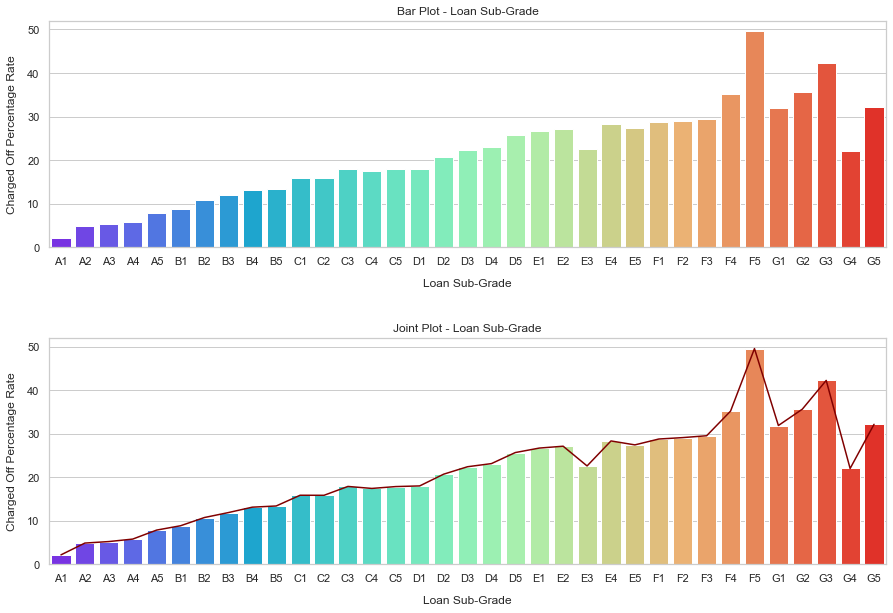

In [119]:
# Getting index and values excluding 'Total'column
x_data = df4.iloc[0:-1].index
y_data = df4.iloc[0:-1]['charged_off_rate']

# plotting for the bivariate variables
bivariate_plot(
    figsize_x=15, figsize_y=10, subplot_x=2, subplot_y=1, xlabel='Loan Sub-Grade', ylabel='Charged Off Percentage Rate', 
    x_axis=x_data, y_axis=y_data, hspace=0.4, wspace=0, xlabel_rotation=0, annotate=False, annot_percent=False
)

__Inference:__ <br>
Based on the analysis, the top 3 sub grades of loans with respect to charged off rate are (Considering proportionate values instead of absolute):
- B
- C
- D

Considering Absolute values, we observe that as the sub grade decreases (A1 to G5), Charged Off rate increases.

##### Employee Length and Funded Amount against Charged Off Rate

In [120]:
# pivot table for emp_length and funded amount
df5 = loan_df.pivot_table(
    values='funded_amnt', index='emp_length', columns='loan_status', aggfunc=np.count_nonzero, fill_value=0,
    margins=True, margins_name='Total'
)
df5

loan_status,Charged Off,Fully Paid,Total
emp_length,,,
0,609,3743,4352
1,440,2624,3064
2,543,3608,4151
3,538,3355,3893
4,438,2782,3220
5,446,2647,3093
6,297,1817,2114
7,250,1403,1653
8,196,1204,1400


In [121]:
# creating charged_off_rate column
df5['charged_off_rate'] = 100 * (round((df5['Charged Off'] / df5['Total']), 6))
df5.describe()

loan_status,Charged Off,Fully Paid,Total,charged_off_rate
count,12.00,12.00,12.00,12.00
mean,867.33,5195.50,6062.83,14.11
std,1397.43,8333.54,9730.33,0.78
min,153.00,1034.00,1187.00,12.89
25%,285.25,1713.50,1998.75,13.77
50%,443.00,2714.50,3156.50,14.02
75%,559.50,3641.75,4201.25,14.38
max,5204.00,31173.00,36377.00,15.68


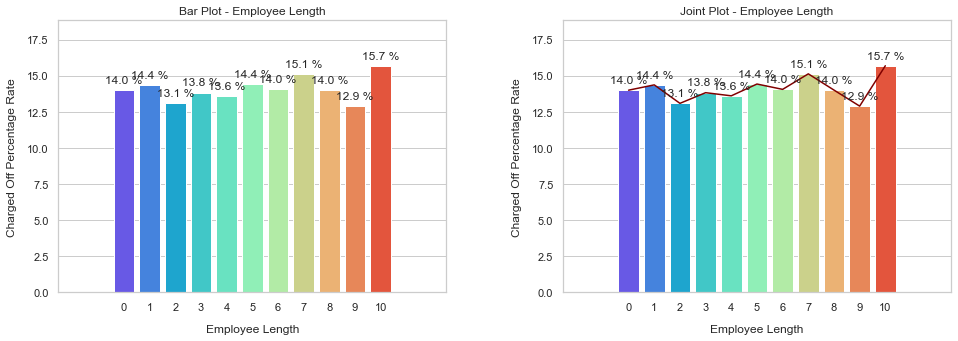

In [122]:
# Getting index and values excluding 'Total'column
x_data = df5.iloc[0:-1].index
y_data = df5.iloc[0:-1]['charged_off_rate']

# plotting for the bivariate variables
bivariate_plot(
    figsize_x=16, figsize_y=5, subplot_x=1, subplot_y=2, xlabel='Employee Length', ylabel='Charged Off Percentage Rate', 
    x_axis=x_data, y_axis=y_data, hspace=0, wspace=0.3, xlabel_rotation=0, annotate=True, annot_percent=True
)

__Inference:__ <br>
Based on the analysis, we observe that the rate of charged off applicants does not vary significantly and is almost a constant across the categories.

#### Continuous Variables - Bivariate Analysis 

In [123]:
# For continous variables, we can find correlation between each variable
charged_off_df = loan_df[loan_df['loan_status'] == 'Charged Off'].corr().round(2)
charged_off_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year,loan_income_ratio
loan_amnt,1.00,0.98,0.90,0.39,0.35,0.92,0.19,0.34,0.06,0.01,0.17,-0.04,0.30,0.04,0.28,0.07,0.12,-0.01,-0.21,0.62
funded_amnt,0.98,1.00,0.92,0.37,0.35,0.95,0.19,0.34,0.06,0.01,0.17,-0.04,0.29,0.04,0.27,0.07,0.13,-0.01,-0.20,0.61
funded_amnt_inv,0.90,0.92,1.00,0.42,0.37,0.85,0.20,0.30,0.07,-0.02,0.14,-0.04,0.24,0.06,0.25,0.12,0.32,-0.01,-0.16,0.57
term,0.39,0.37,0.42,1.00,0.46,0.12,0.14,0.07,0.07,-0.00,0.06,0.00,0.07,0.04,0.12,0.07,0.37,-0.02,-0.07,0.31
int_rate,0.35,0.35,0.37,0.46,1.00,0.32,0.04,0.13,0.05,0.06,0.04,0.09,0.07,0.38,-0.01,0.08,0.19,-0.01,0.09,0.19
installment,0.92,0.95,0.85,0.12,0.32,1.00,0.16,0.35,0.04,0.02,0.17,-0.03,0.29,0.07,0.25,0.05,0.03,-0.01,-0.17,0.55
emp_length,0.19,0.19,0.20,0.14,0.04,0.16,1.00,0.13,0.06,0.01,0.09,0.07,0.14,0.03,0.18,0.01,0.11,-0.03,-0.24,0.03
annual_inc,0.34,0.34,0.30,0.07,0.13,0.35,0.13,1.00,-0.09,0.04,0.20,0.00,0.37,0.06,0.28,0.01,-0.02,-0.02,-0.22,-0.26
dti,0.06,0.06,0.07,0.07,0.05,0.04,0.06,-0.09,1.00,-0.03,0.30,0.00,0.24,0.23,0.27,0.04,0.09,0.02,-0.08,0.10
inq_last_6mths,0.01,0.01,-0.02,-0.00,0.06,0.02,0.01,0.04,-0.03,1.00,0.09,0.02,-0.01,-0.13,0.11,0.03,-0.08,0.01,-0.02,-0.05


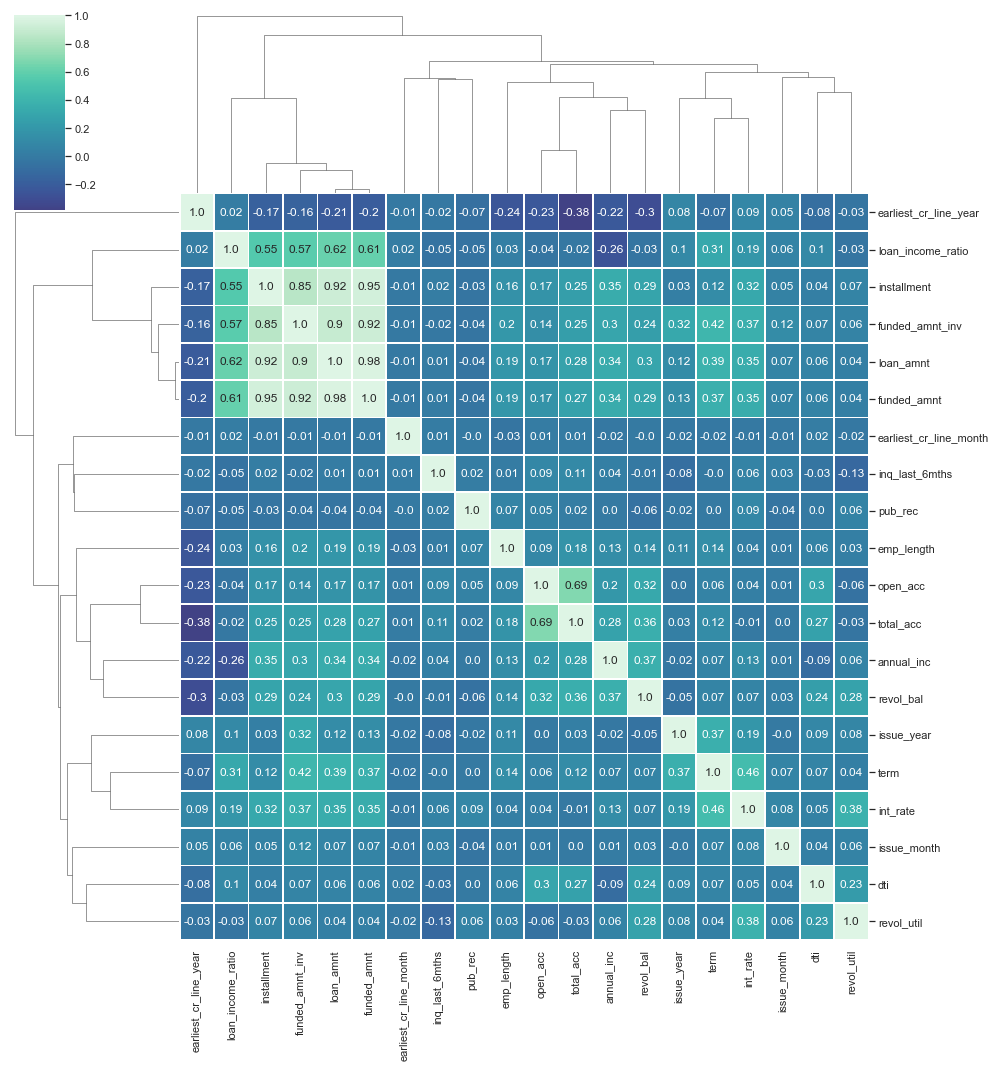

In [124]:
# Plotting a cluster map
kwargs = {'annot': True, 'fmt':'.2'}

sns.clustermap(charged_off_df, center=0, cmap='mako', linewidths=0.75, figsize=(14, 15), **kwargs)
plt.show()

__Inference:__ <br>
Based on the correlation matrix, we can infer that,
- funded_amnt, loan_amnt, loan_income_ratio, installment and funded_amnt_inv are positively correlated to each other. They form a cluster.
- int_rate is positively correlated to loan_income_ratio, loan_amnt and total_amnt

## Conclusion:

Major variables to consider for loan prediction:
1. Loan Purpose
2. Loan Amount
3. Interest Rate
4. Annual Income
5. Grade
6. Sub-grade
7. Term
8. DTI

### Insights

#### Loan Purpose:
- Based on the number of records, we can observe that __majority of the applicants__ stated __debt_consolidation__, __credit_card__ and __other__ as the purpose for loan.
- Considering only Charged Off, the purpose category small_business (27%), other (16%) have the maximum number of charged off applicants. However, __considering proportion of loans__ disbursed, __small_business is too small to be significant__ and hence __`debt_consolidation`__, __`credit_card`__ and __`other`__ have the __maximum Charged Off applicants__.
- The `'purpose'` is a __significant__ variable for analysis.
    
#### Loan Amount:
- Based on the number of loans disbursed, the range between 5K to 10K was the highly lent bucket
- Considering Charged Off loans, we see an increase in the default rate as the amount increase __thought not significantly high__.
- The __bucket 25K+ has the highest number of charged off applicants__. 
- The variable __`'loan_amount'`__ offers __significant__ value to our analysis.

#### Interest Rate:
- Based on the number of loans disbursed, the interest range between __10-15%__ was the most lent rate contributing to 47% of the loans disbursed.
- Considering Charged Off loans, we see an __increase in the default rate__ as the __interest rate increase__ which is __significant__.
- The __Interest rate bucket 15+ has the highest number of charged off applicants__. 
- The variable __`'int_rate'`__ offers __significant__ value to our analysis.
- As the __Interest Rate increases, Charge Off Rate Increases__.

#### Annual Income:
- Based on the number of loans disbursed, the loans were disbursed to the applicants between range __50K to 75K__.
- Considering Charged Off loans, we see an __decrease__ in defaulting as the __income range increase__ which is a linear decrease.
- There variable __`'annual_inc'`__ offers __significant__ value to our analysis.
- As the __Annual Income decreases, Charge Off Rate Increases__.

#### Grade:
- Based on the number of records, the __maximum number of loans__ disbursed by Lending club was graded as __B, A and C__.
- Considering only charged off, we see an __inverse relationship__ whereas the __grade decreases (A to G)__, the number of __Charged Off applicants increase__. __The maximum defaulters belong to Grades G, F and E__.
- However, __considering the proportion of loans disbursed__, __Grades C, D and E__ have significant number of charged off applicants.
- We can infer that Lending club is using the __correct strategy__ to disburse loans based on the grades and ___`'Grade'` is a significant variable in risk analysis___.
- As the __Grade decreases, Charge Off Rate Increases__.

#### Sub-Grade:
- Based on the number of records, the __maximum number of loans__ disbursed by Lending club belong to __Sub Grades A, B, and C__.
- Considering only charged off, we see an __inverse relationship__ whereas the __grade decreases (A to G)__, the number of __Charged Off applicants increase__. __The maximum defaulters belong to Grades G, F and E__.
- However, __considering the proportion of loans__ disbursed, __Sub Grade B, C and D have the maximum number of Charged Off applicants__.
- We can infer that Lending club is using the __correct strategy__ to disburse loans based on the grades and ___`Grade` is a significant variable in risk analysis___.
- As the __Sub-Grade decreases, Charge Off Rate Increases__.

#### Term:
- Based on the number of records, we can observe that __majority of the applicants__ chose __36 months (3 years)__ and __60 months (5 years)__ for term.
- Considering only charged off, the term __`60 months (5 years)`__ has the __maximum number of Charged Off applicants__.
- The __`'term'`__ is a __significant__ variable for analysis.
- As the __Term Increases, Charge Off Rate Increases__.

#### DTI:
- Based on the analysis, the dti range is maximum for the range __10-20 %__ among the applicants
- Considering Charged Off loans, we see an __increase__ in the default rate as the __dti range increases__. This implies that Higher the DTI range, chances are the loans being charged off.
- The variable __`'dti'`__ offers __signifincant__ value to our analysis.